In [1]:
## all imports
from IPython.display import HTML
import chardet
import io
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import requests
import operator
import socket
import _pickle
import math
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
import json

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")
import matplotlib.patches as mpatches

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
from datetime import datetime

import matplotlib.dates as mdates

#from secret import *

### START GRAPHING

In [2]:
if os.path.isfile("Master_File_File.csv"):
    filepath_master = "Master_File_File.csv"
    print ("Master_File_.csv loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("afl.com.au loading from the internet")



Master_File_.csv loading from file


In [173]:
df= pd.read_csv(filepath_master)
print ("done")

done


In [ ]:
### EXAMINE ACROSS MATCHES- HOW OFTEN DO WE WIN IF WE HAVE THE MOST KICKS IN A GAME COMPARED TO HANDBALLS

In [174]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

### USEFUL LINKS

https://matplotlib.org/users/legend_guide.html

http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_markersize

https://matplotlib.org/users/colors.html

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

In [5]:
df_raindata[df_raindata.TOTAL_SCORE > 300]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  BEHINDS  BOUNCES  \
5722        5288          5290            5290       13        9   
5723        5289          5291            5291       12       31   
6202        6132          6134            6134        9       11   
6203        6133          6135            6135        9       14   

      CENTRECLEARANCES  CLANGERS  CONTESTEDMARKS  CONTESTEDPOSSESSIONS  \
5722                21        33              12                   134   
5723                22        37              14                   113   
6202                23        26              16                   126   
6203                24        30              18                   134   

      DISPOSALEFFICIENCY       ...        RAIN       CITY           VENUE  \
5722                81.8       ...         0.0  Melbourne  Etihad Stadium   
5723                81.4       ...         0.0  Melbourne  Etihad Stadium   
6202                84.9       ...         0.0  Melbourne             MCG   
6203                78.7       ...         0.0  Melbourne             MCG   

      DATE   ROUND_WIKI       DAY  MONTH       MATCH_LINK  TEAM_SCORE  \
5722    31  Not Defined  Saturday    May  No Match Report         145   
5723    31  Not Defined  Saturday    May  No Match Report         156   
6202    22  Not Defined    Sunday   July  No Match Report         171   
6203    22  Not Defined    Sunday   July  No Match Report         159   

      OPPONENT_SCORE  
5722             156  
5723             145  
6202             159  
6203             171  

[4 rows x 78 columns]

In [ ]:
df

### WIN/LOSS FUNCTION

In [183]:
def make_winlossgraph (datatype, label):
    df_win = df[df.RESULT == "Win"]
    df_lose = df[df.RESULT == "Lose"]
    y1 = df_win[datatype]
    y2= df_lose[datatype]
    time_range = df_win.PLOT_TIME

    plt.plot_date(time_range, y1, markersize= 4, markerfacecolor = 'navy', label='WINNING TEAM', alpha = 0.8)
    plt.plot_date(time_range, y2, markersize= 4, markerfacecolor = 'orange', label = "LOSING TEAM", alpha = 0.8)

    plt.title("TOTAL MATCHDAY" + " " + label + " " + "FOR WINNING AND LOSING TEAM")
    plt.ylabel(label)
    plt.xlabel("YEARS")

    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.2)
    plt.show()

### TOTALS FUNCTION

In [155]:
def make_totalsgraph (df,datatype, label):
    
    if datatype == 'RAIN':
        df = df[df.RAIN != "No Data"]
    else:
        df = df

    y1 = df[datatype]
    time_range = df.PLOT_TIME

    plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue', label= label)

    plt.title(label + " " + "PER MATCH")
    plt.ylabel(label)
    plt.xlabel("YEARS")

    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.4)
    plt.show()

### RAIN FUCNTION

In [195]:
def make_winraingraph (datatype, label):
    df_raindata = df[df.RAIN != "No Data"]
    df_raindata.RAIN = df_raindata.RAIN.astype(float)
    rain = df_raindata[df_raindata.RAIN == 0.0]
    no_rain = df_raindata[df_raindata.RAIN > 0.0]

    y1 = no_rain[datatype]
    y2= rain[datatype]
    time_range_no_rain = no_rain.PLOT_TIME
    time_range_rain = rain.PLOT_TIME

    plt.plot_date(time_range_no_rain, y1, markersize= 3.5, markerfacecolor = 'navy', label='WITHOUT RAIN')
    plt.plot_date(time_range_rain, y2, markersize= 3.5, markerfacecolor = 'orange', label = "WITH RAIN")

    plt.title(label + " " + "FOR RAIN CONDITIONS")
    plt.ylabel(label)
    plt.xlabel("YEARS")

    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.2)
    plt.show()

### MATCHDAY PERCENTAGE 
##### see download scrape on how to do it in place

In [202]:
def percentage_graphdata(base_type, datatype):  
    match_totals = df[[input_data]].groupby(df.MATCH_ID).sum()

    def _percentage(x):
        current_match_id = x.MATCH_ID
        total_row = match_totals.loc[current_match_id]
        total_row_output = total_row[input_data]
        percentage = (x[input_data]/ total_row_output)*100
        return float(("%.2f" % round(percentage,2)))

    df[column_name] = df.apply(_percentage, axis=1)
    return df[column_name].head()

# percentage_graphdata("KICKS", "KICKS_PERC")  



In [206]:
def perc_graph (basetype, datatype, label):

    percentage_graphdata(basetype, datatype)
    make_winlossgraph(datatype, label) 

### GRAPHS

Q:\Users\ssweeney\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


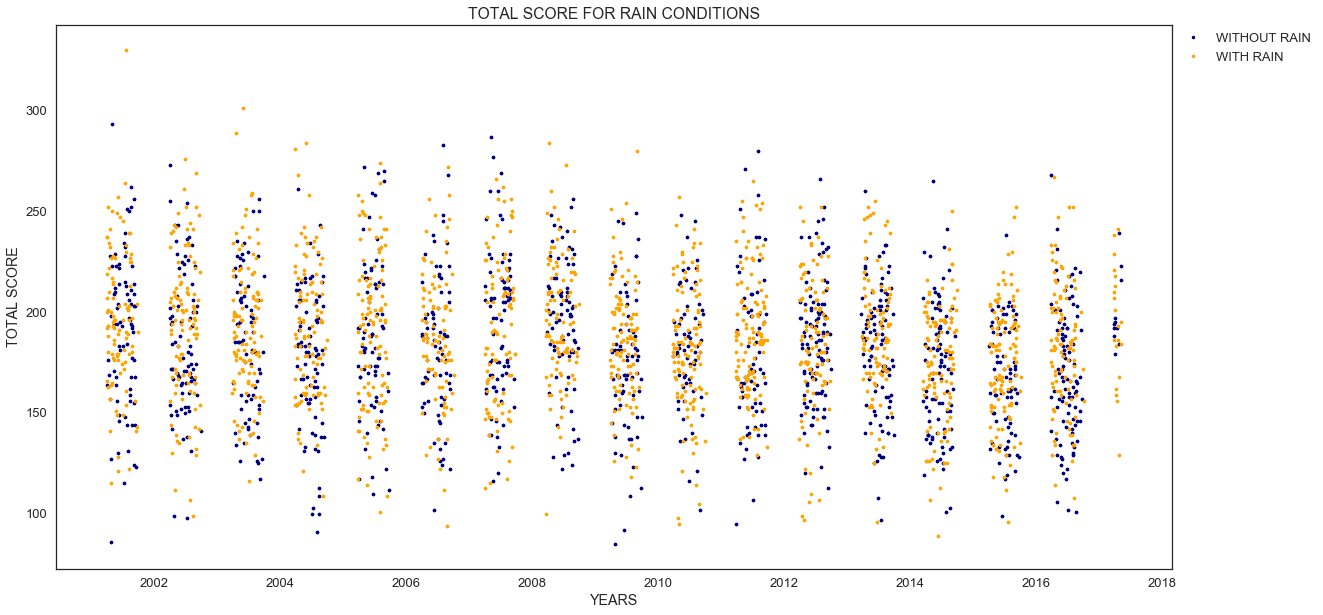

In [196]:
datatype = 'TOTAL_SCORE'
label = 'TOTAL SCORE'

make_winraingraph(datatype, label) 

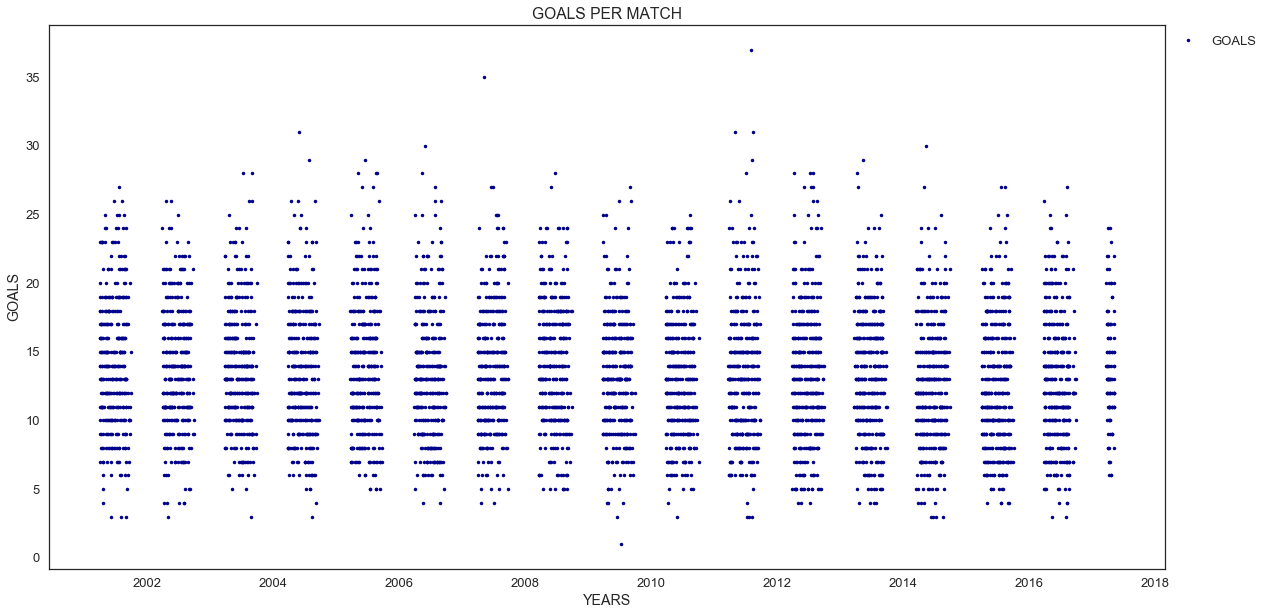

In [310]:
datatype = 'GOALS'
label = 'GOALS'

make_totalsgraph(df, datatype, label)

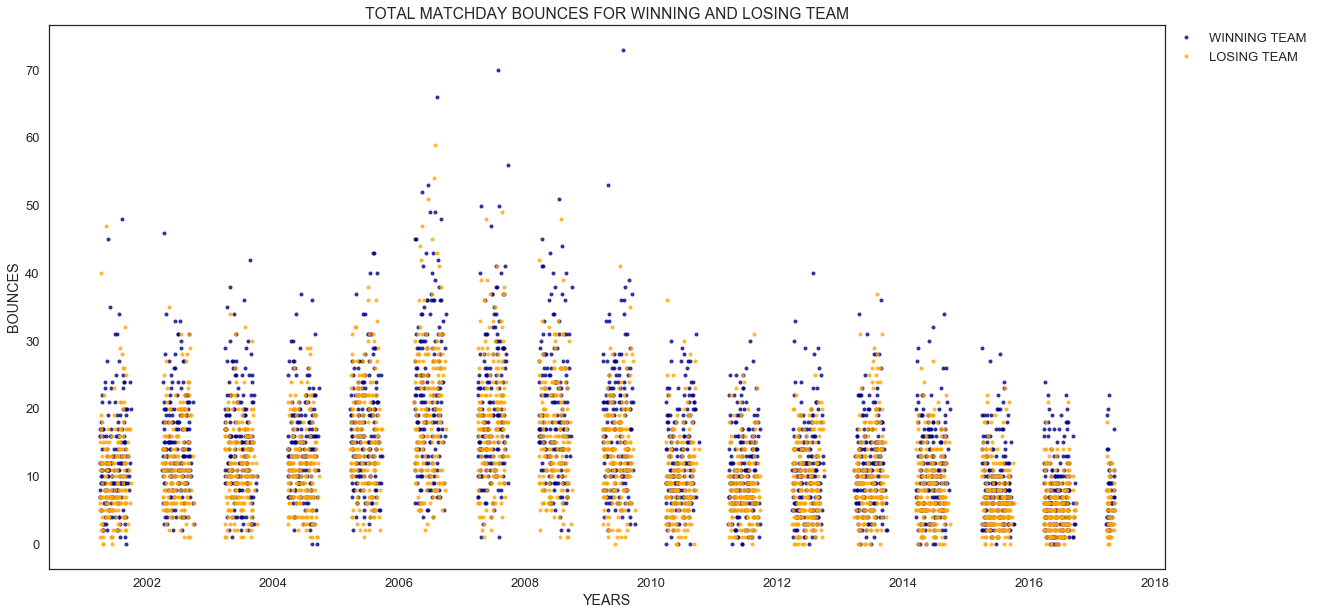

In [178]:
datatype = 'BOUNCES'
label = 'BOUNCES'

make_winlossgraph(datatype, label) 

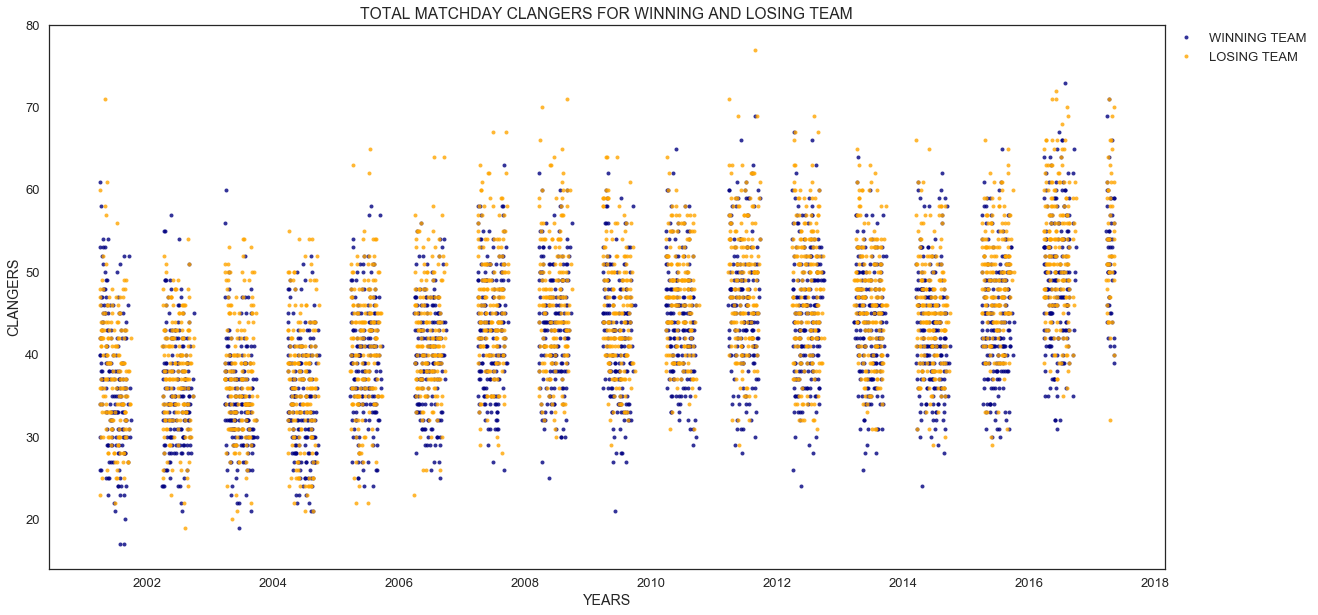

In [254]:
datatype = 'CLANGERS'
label = 'CLANGERS'

make_winlossgraph(datatype, label) 

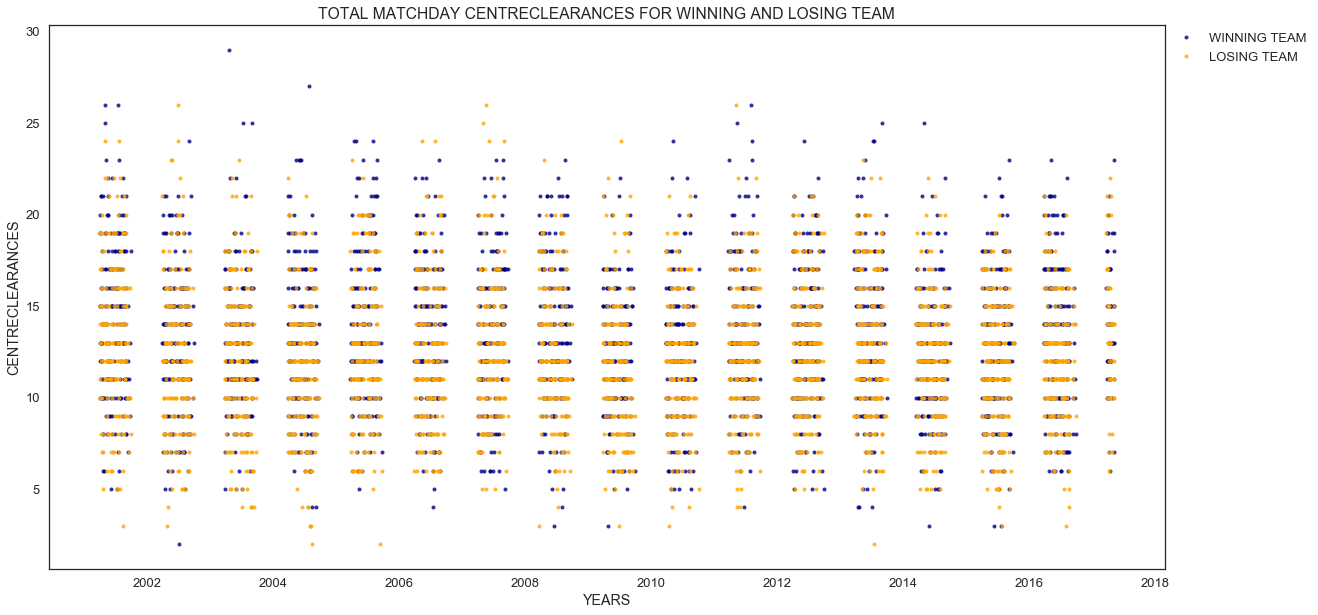

In [340]:
datatype = 'CENTRECLEARANCES'
label = 'CENTRECLEARANCES'

make_winlossgraph(datatype, label) 

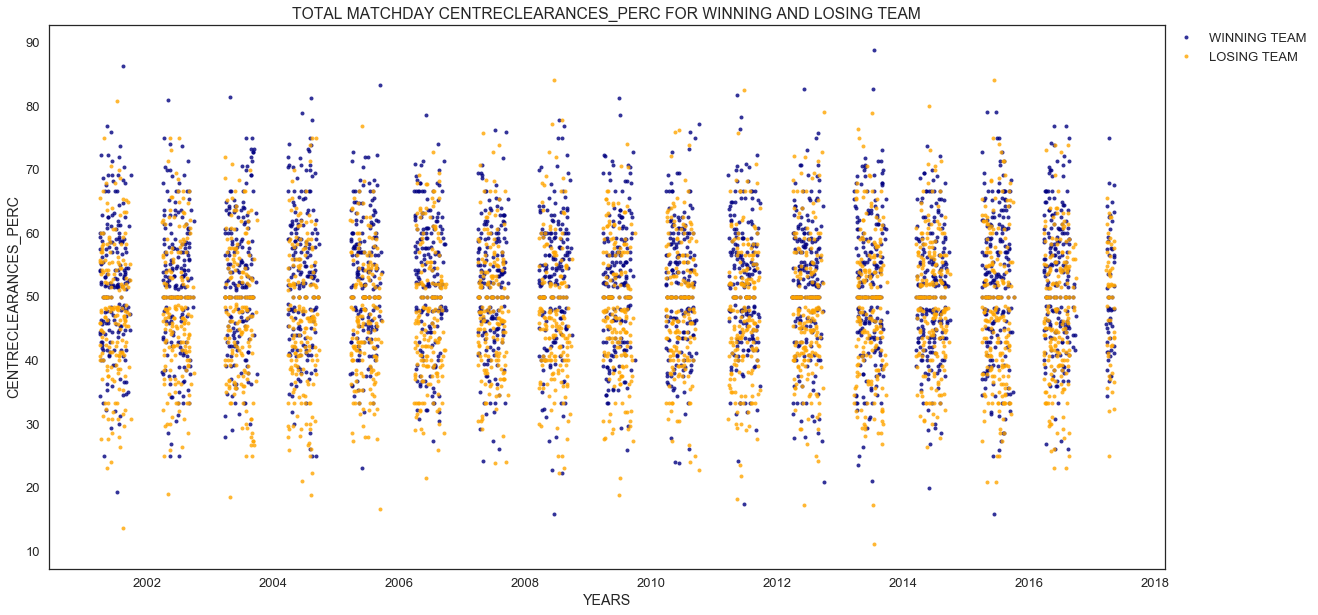

In [184]:
datatype = 'CENTRECLEARANCES_PERC'
label = 'CENTRECLEARANCES_PERC'

make_winlossgraph(datatype, label) 

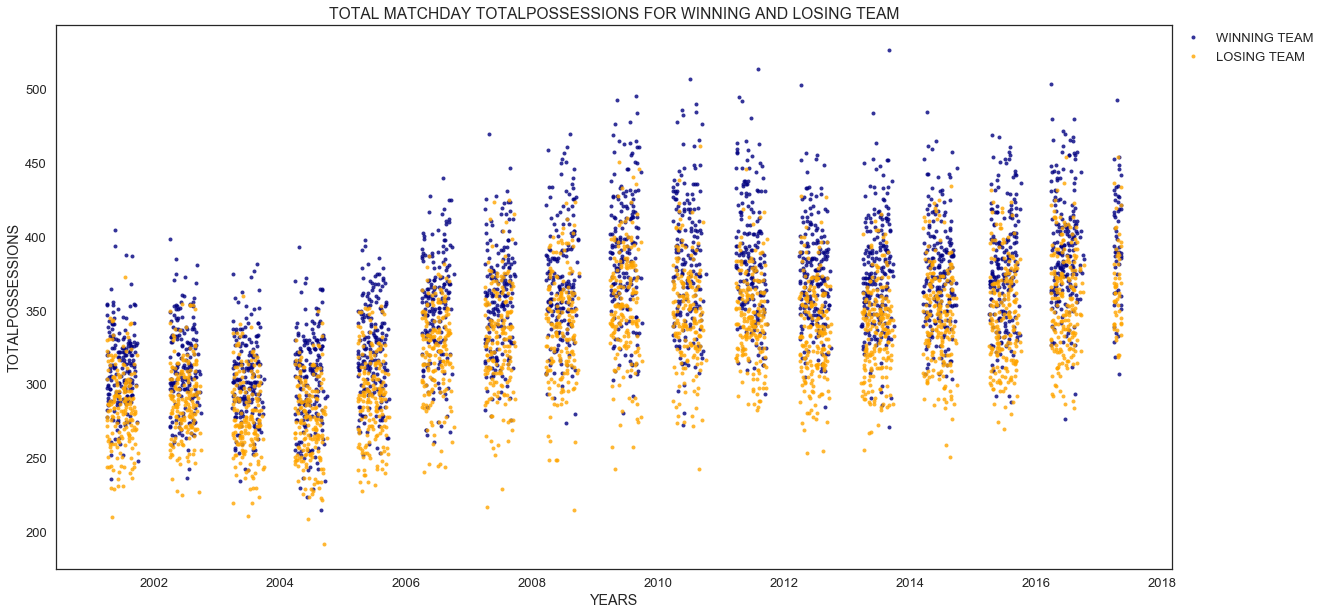

In [329]:
datatype = 'TOTALPOSSESSIONS'
label = 'TOTALPOSSESSIONS'

make_winlossgraph(datatype, label) 

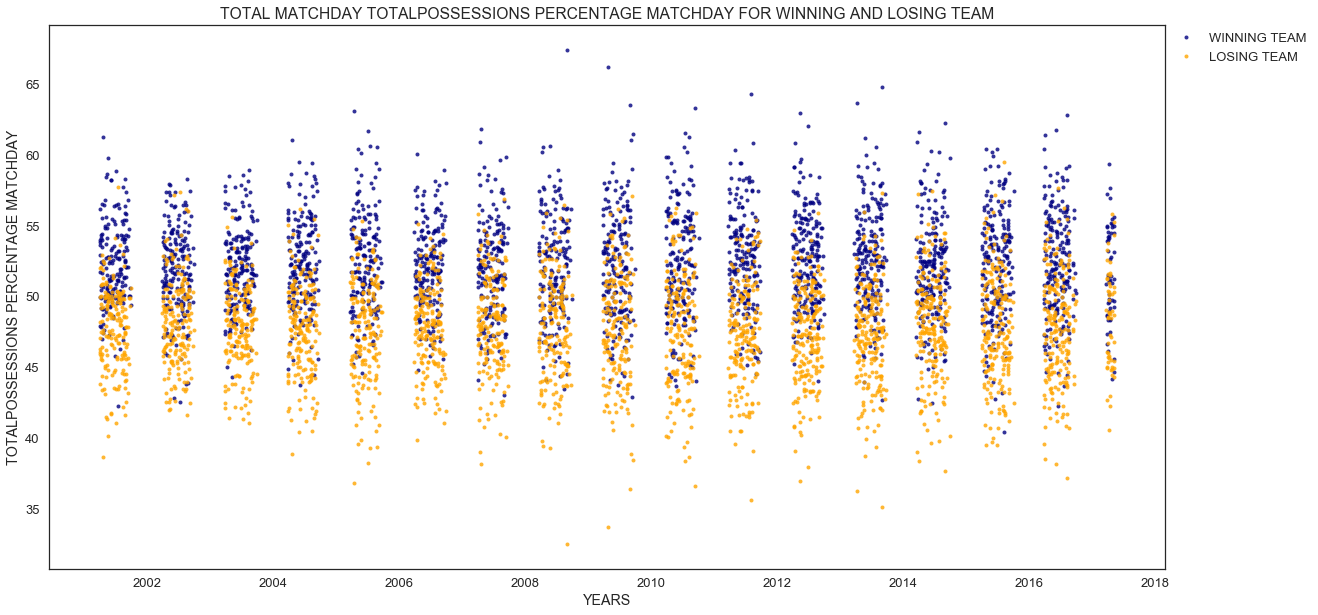

In [338]:
datatype = 'TOTALPOSSESSIONS_PERC'
label = 'TOTALPOSSESSIONS PERCENTAGE MATCHDAY'

make_winlossgraph(datatype, label) 

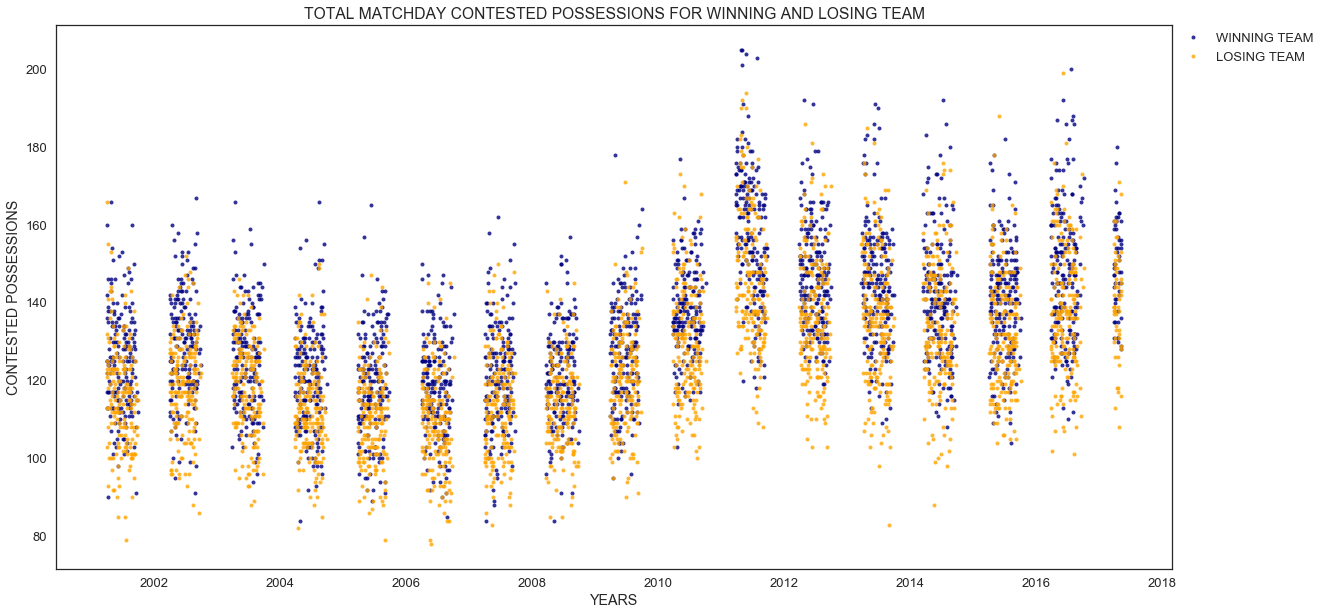

In [252]:
datatype = 'CONTESTEDPOSSESSIONS'
label = 'CONTESTED POSSESSIONS'

make_winlossgraph(datatype, label) 

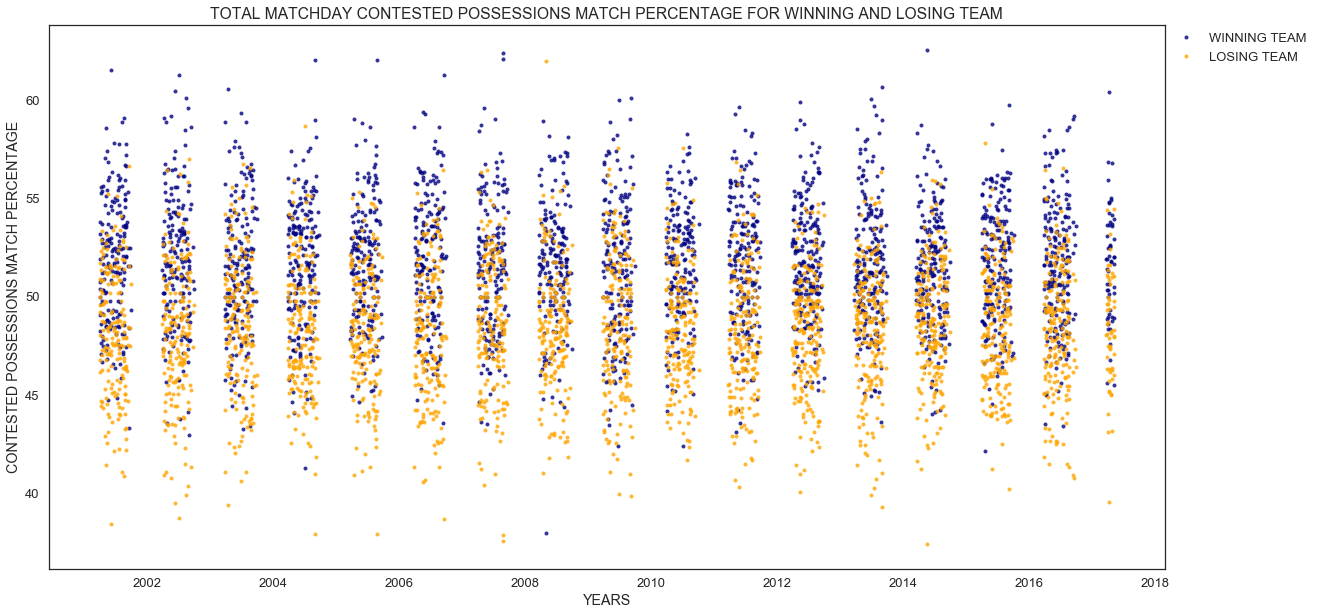

In [297]:
datatype = 'CONTESTEDPOSSESSIONS_PERC'
label = 'CONTESTED POSSESSIONS MATCH PERCENTAGE'

make_winlossgraph(datatype, label) 

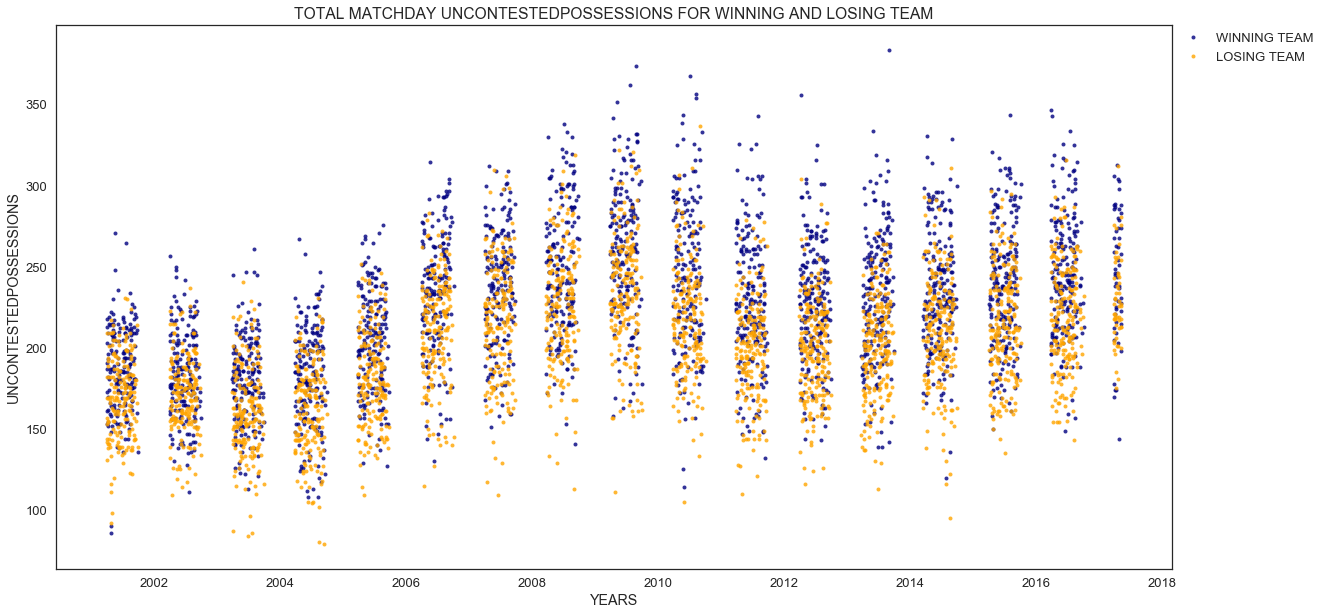

In [330]:
datatype = 'UNCONTESTEDPOSSESSIONS'
label = 'UNCONTESTEDPOSSESSIONS'

make_winlossgraph(datatype, label) 

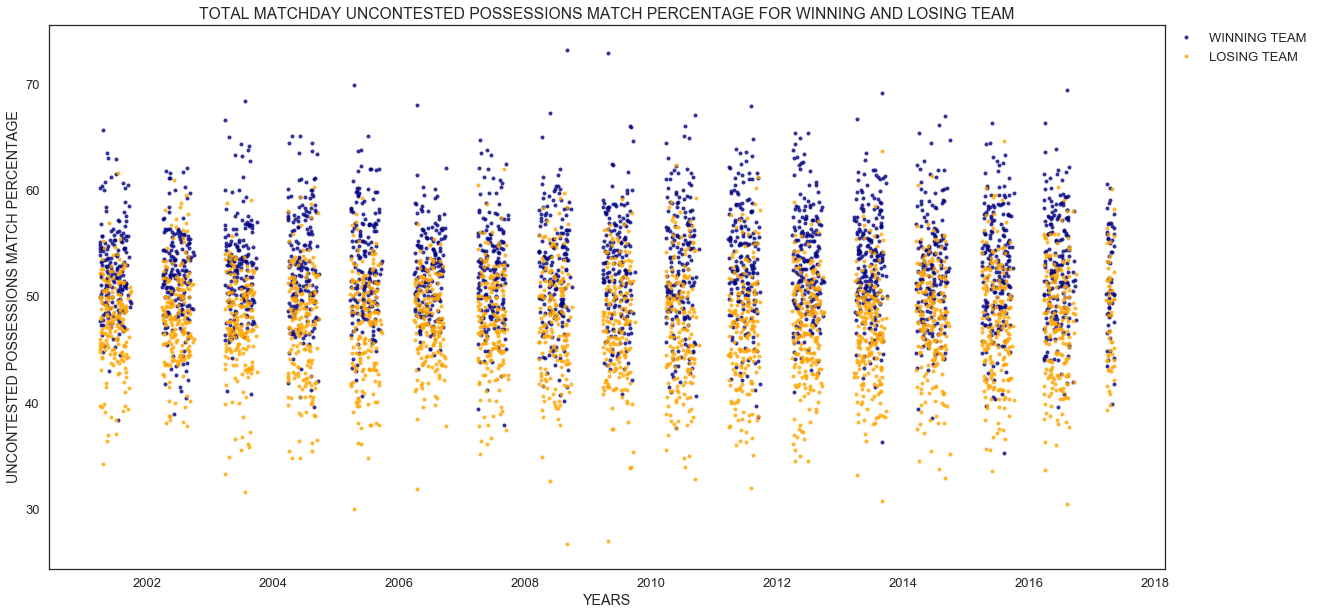

In [332]:
datatype = 'UNCONTESTEDPOSSESSIONS_PERC'
label = 'UNCONTESTED POSSESSIONS MATCH PERCENTAGE'


make_winlossgraph(datatype, label) 

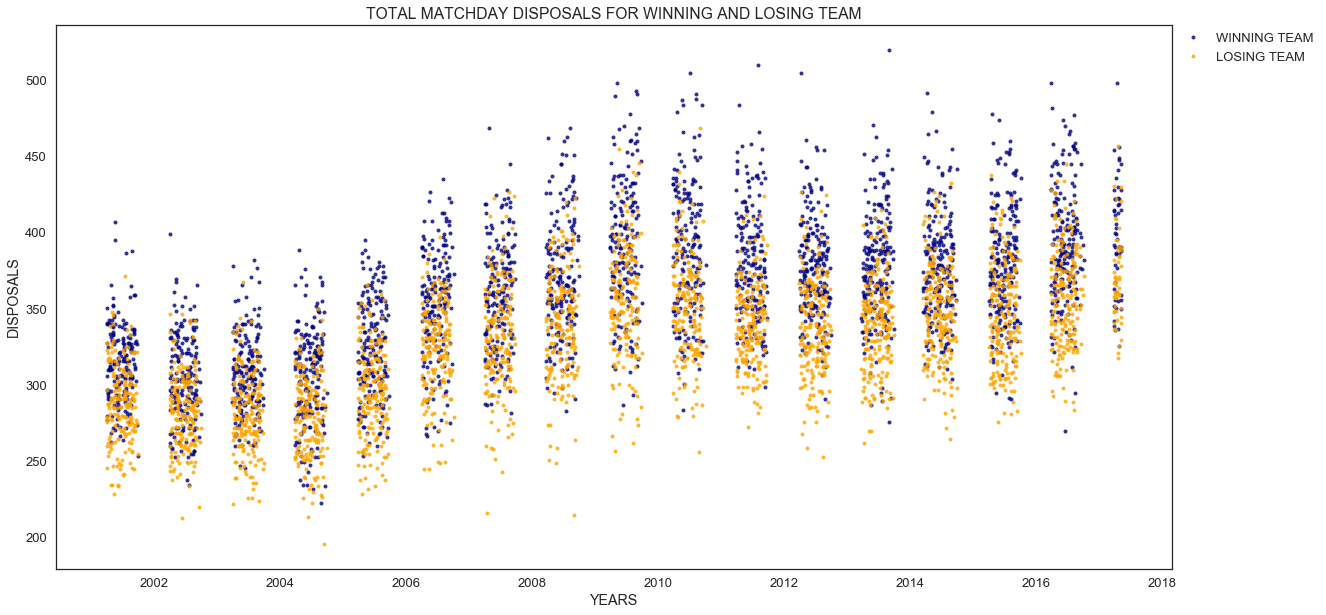

In [295]:
datatype = 'DISPOSALS'
label = 'DISPOSALS'

make_winlossgraph(datatype, label) 

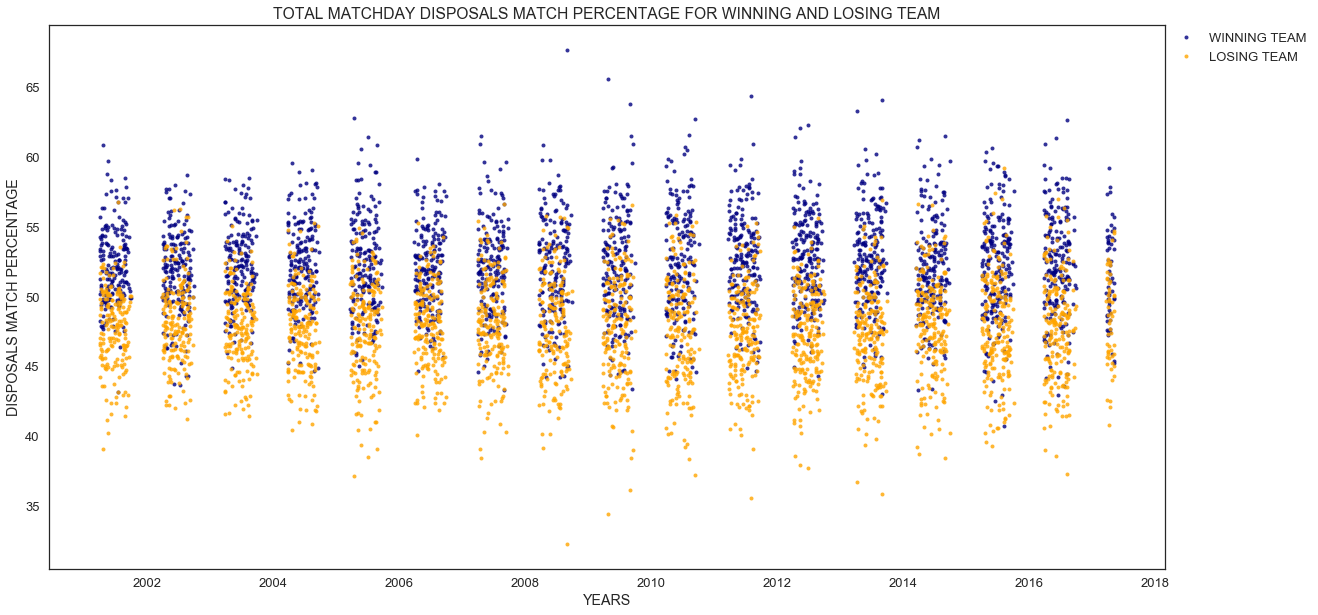

In [296]:
datatype = 'DISPOSALS_PERC'
label = 'DISPOSALS MATCH PERCENTAGE'

make_winlossgraph(datatype, label) 

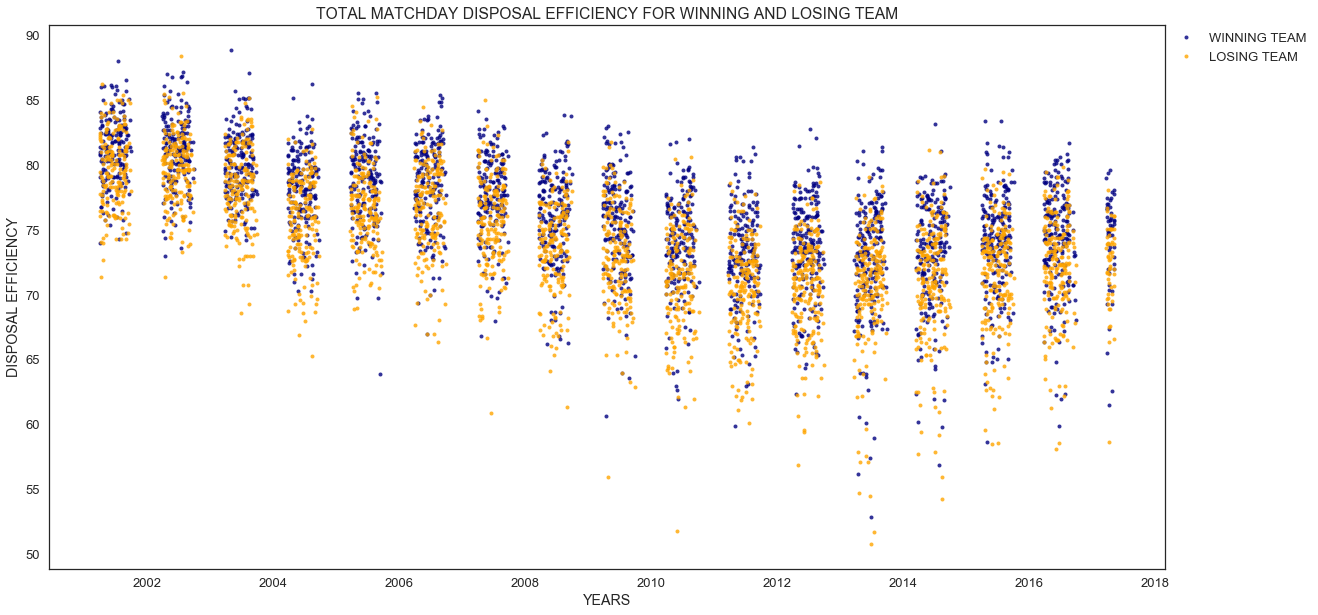

In [257]:
datatype = 'DISPOSALEFFICIENCY'
label = 'DISPOSAL EFFICIENCY'

make_winlossgraph(datatype, label) 

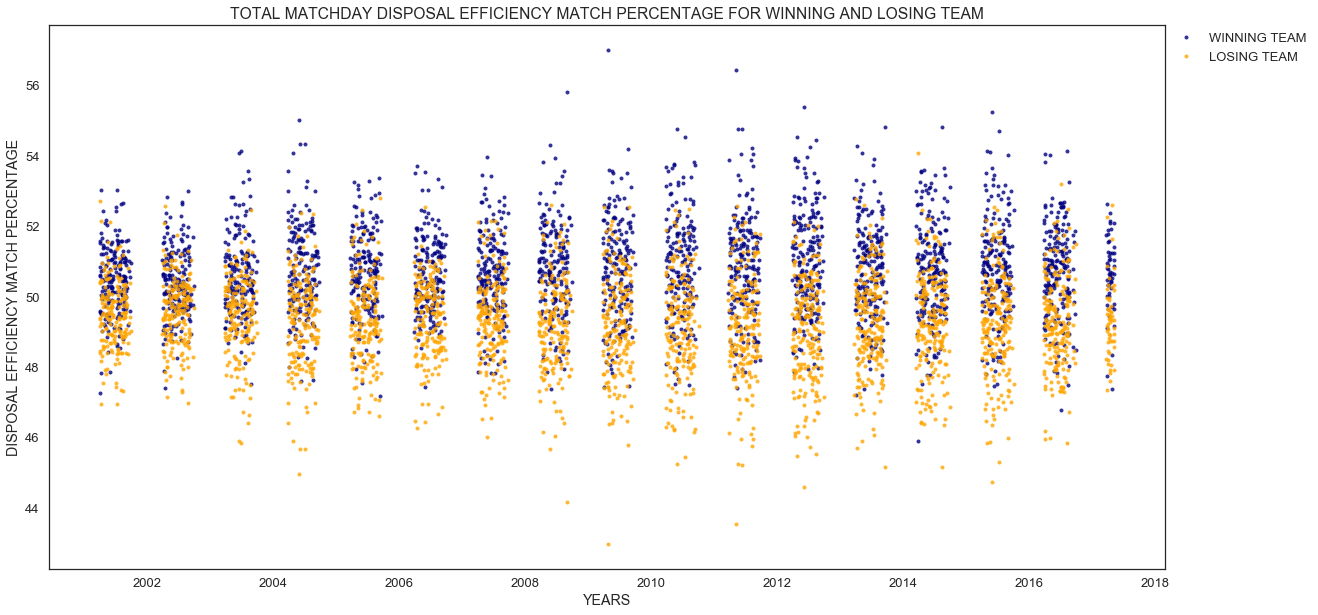

In [298]:
datatype = 'DISPOSALEFFICIENCY_PERC'
label = 'DISPOSAL EFFICIENCY MATCH PERCENTAGE'

make_winlossgraph(datatype, label) 

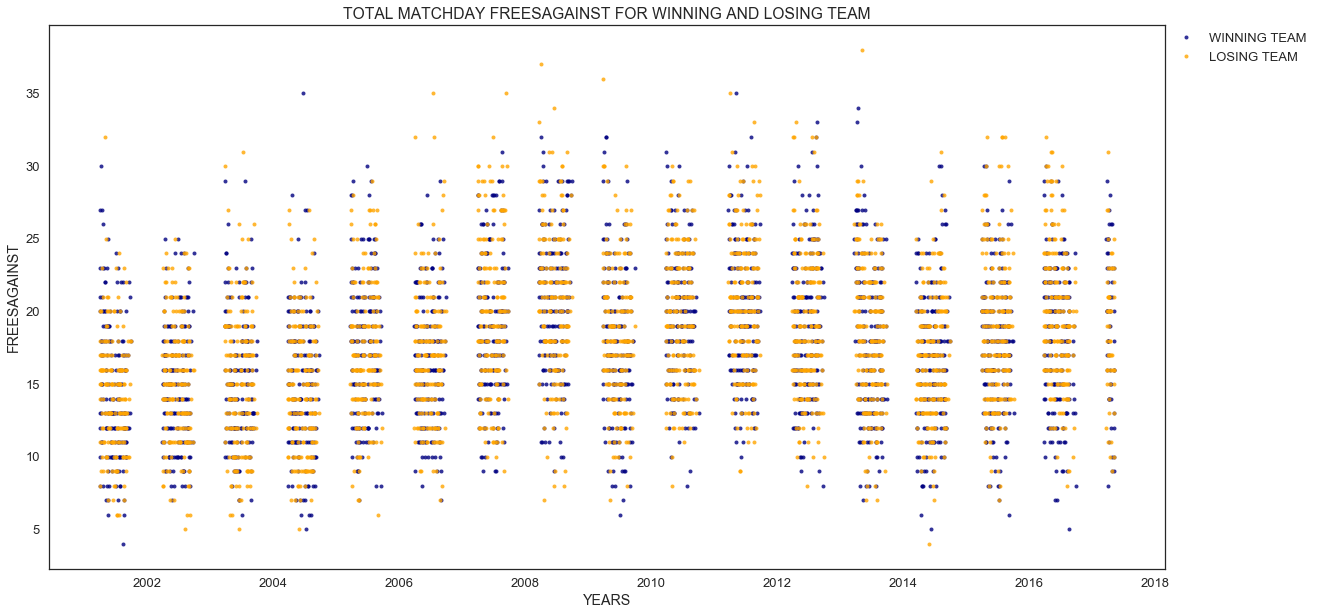

In [299]:
datatype = 'FREESAGAINST'
label = 'FREESAGAINST'

make_winlossgraph(datatype, label) 

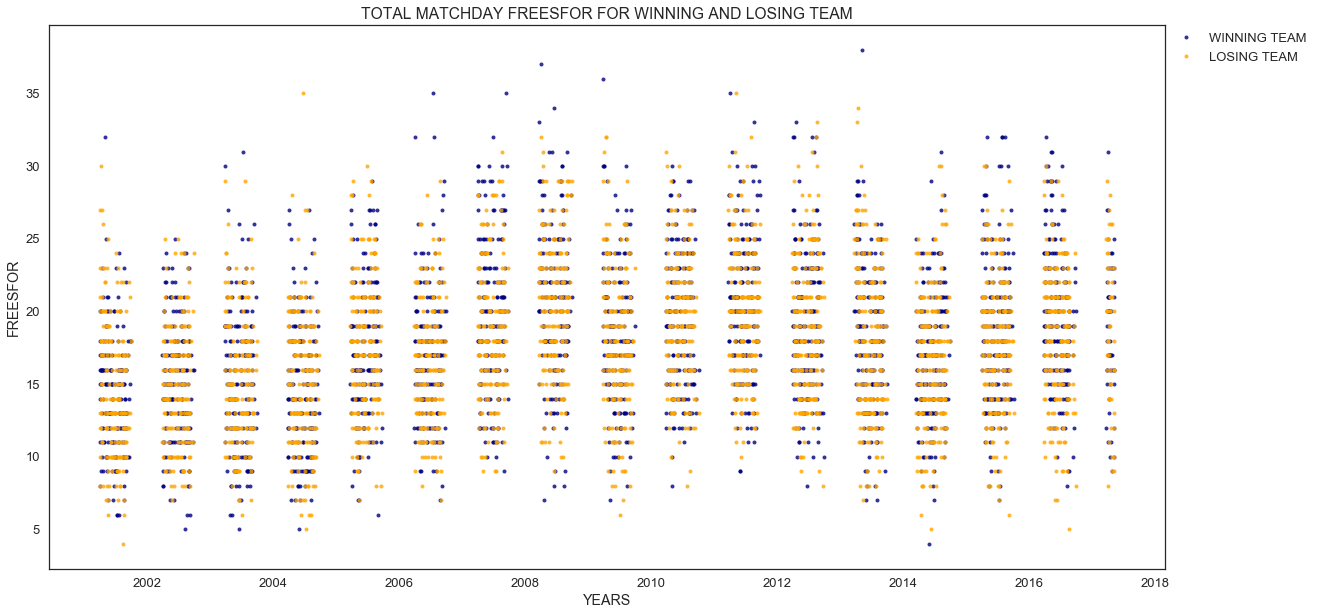

In [300]:
datatype = 'FREESFOR'
label = 'FREESFOR'

make_winlossgraph(datatype, label) 

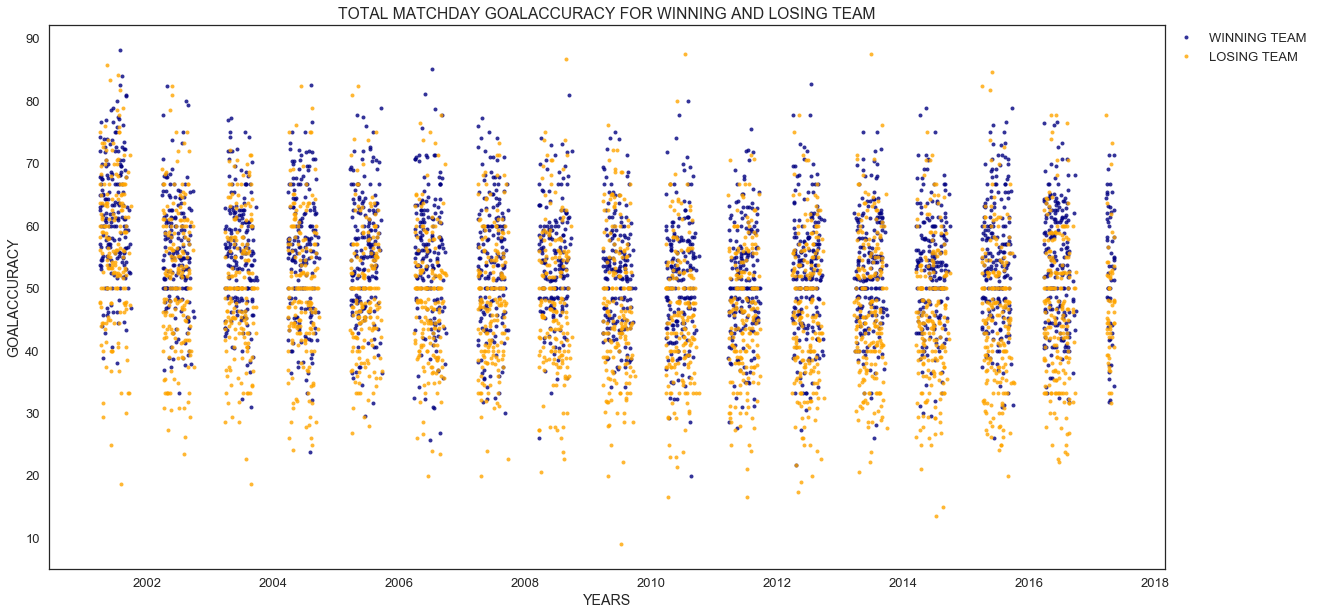

In [301]:
datatype = 'GOALACCURACY'
label = 'GOALACCURACY'

make_winlossgraph(datatype, label) 

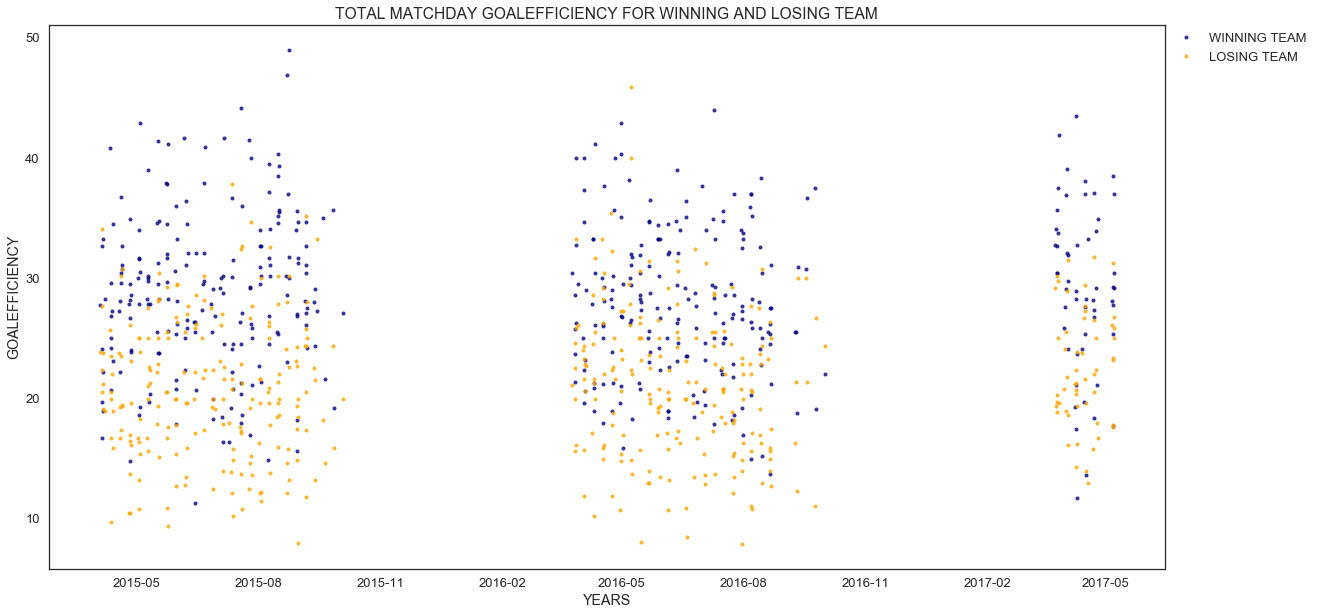

In [302]:
datatype = 'GOALEFFICIENCY'
label = 'GOALEFFICIENCY'

make_winlossgraph(datatype, label) 

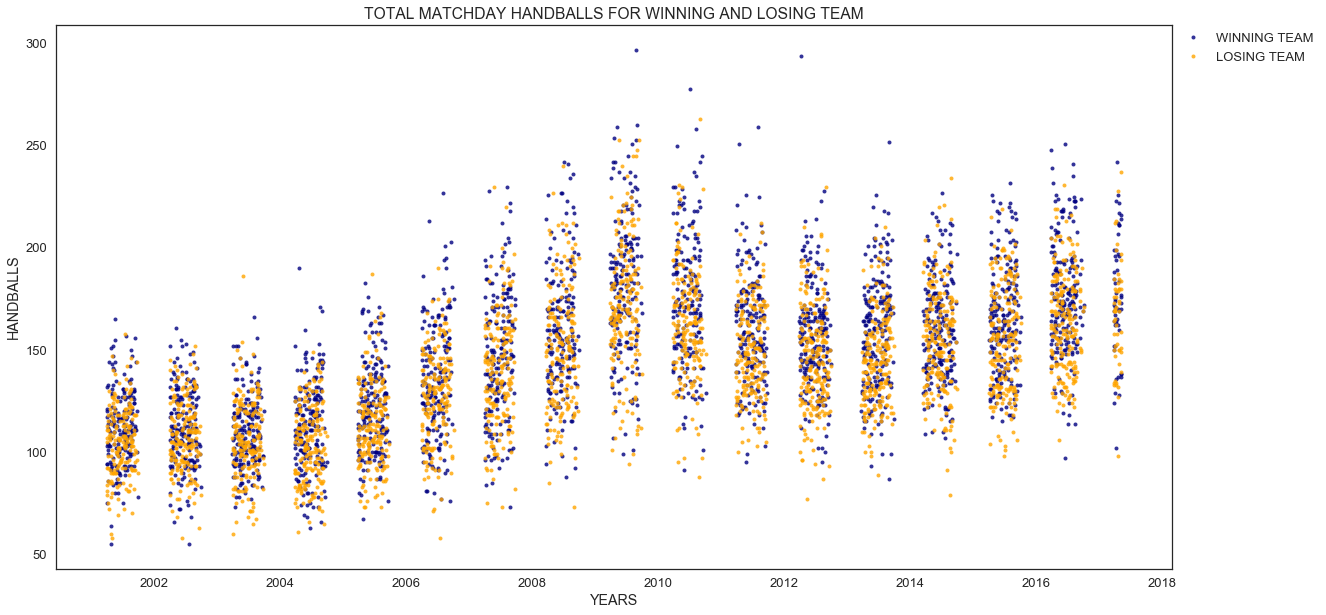

In [311]:
datatype = 'HANDBALLS'
label = 'HANDBALLS'

make_winlossgraph(datatype, label) 

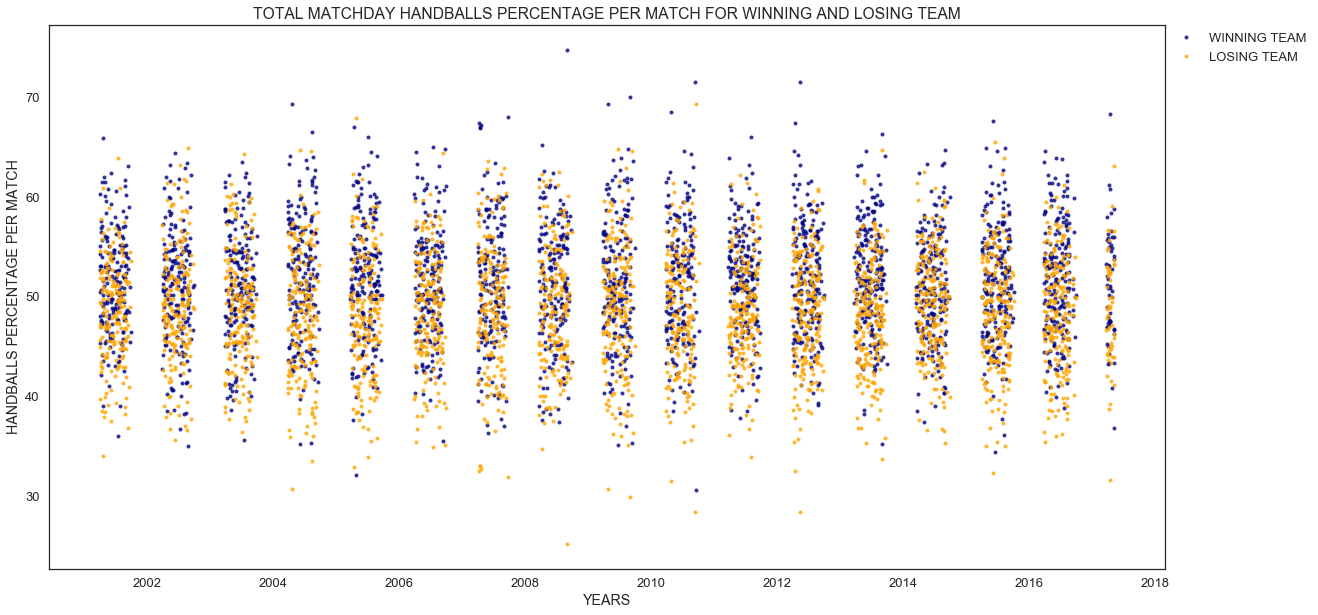

In [312]:
datatype = 'HANDBALLS_PERC'
label = 'HANDBALLS PERCENTAGE PER MATCH'

make_winlossgraph(datatype, label) 

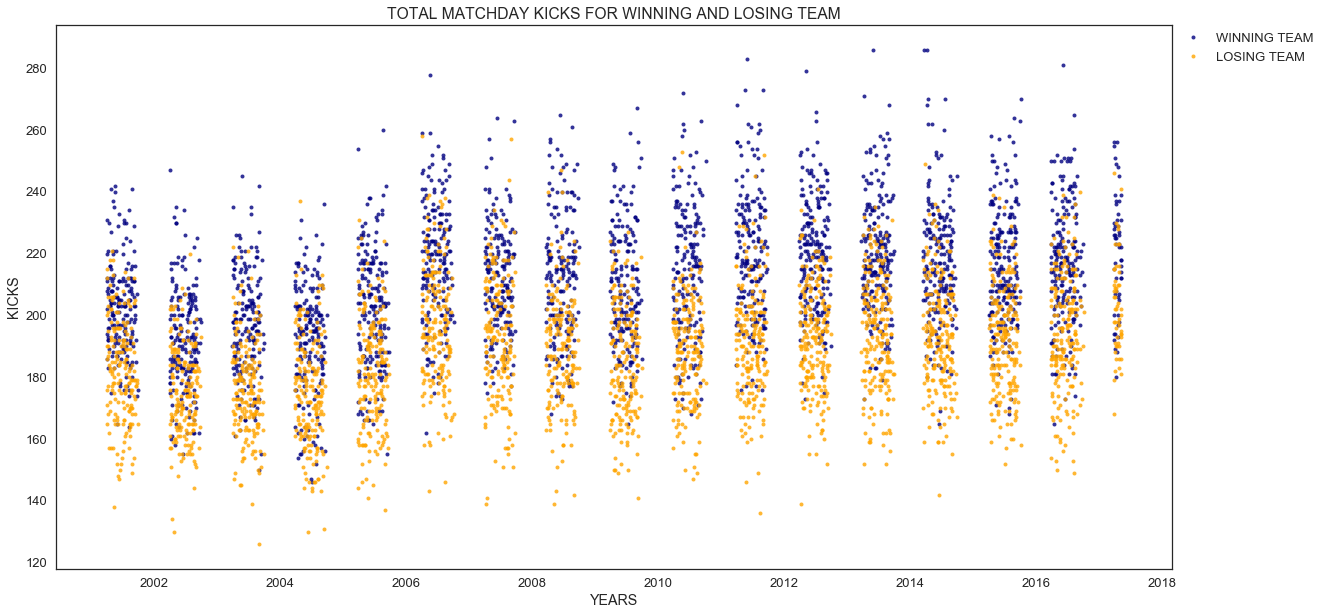

In [313]:
datatype = 'KICKS'
label = 'KICKS'

make_winlossgraph(datatype, label) 

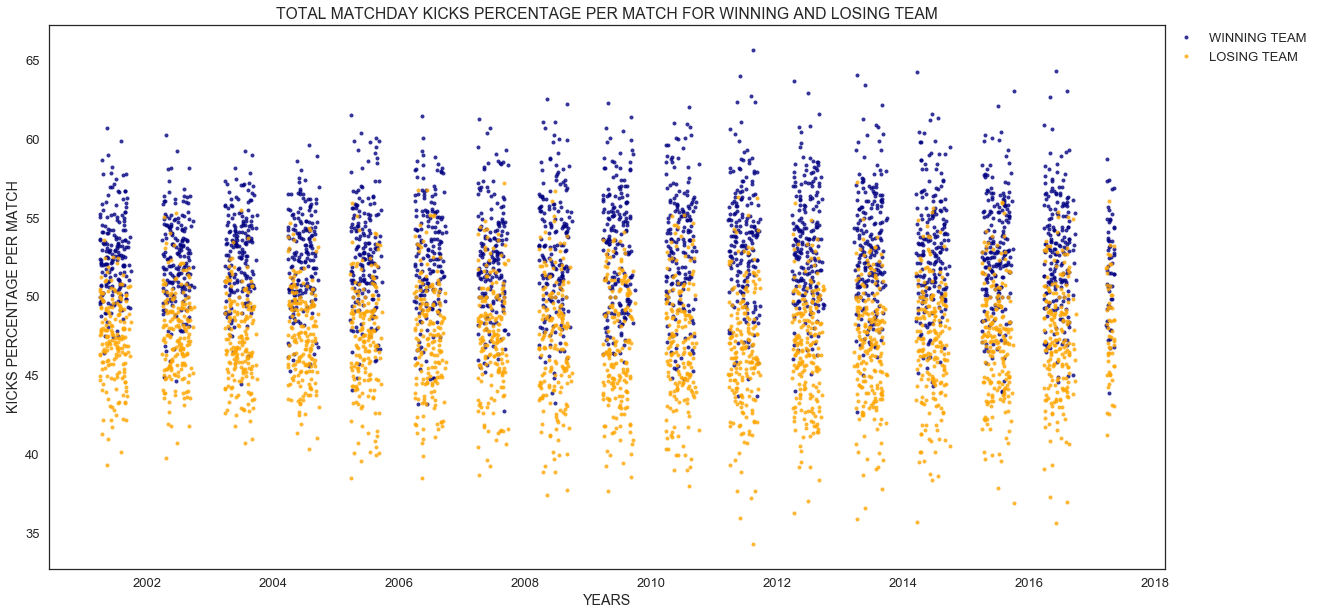

In [210]:
basetype = 'KICKS'
datatype = 'KICKS_PERC'
label = 'KICKS PERCENTAGE PER MATCH'

 
perc_graph (basetype, datatype, label)

### do match day percentage function for kicks

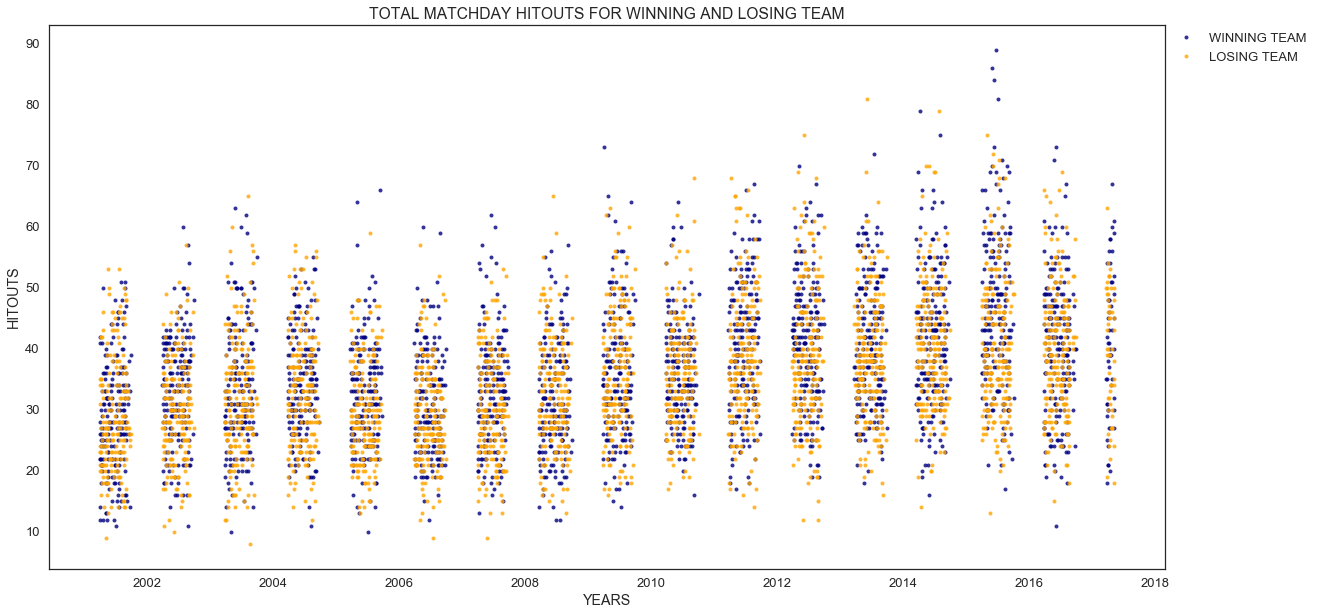

In [314]:
datatype = 'HITOUTS'
label = 'HITOUTS'

make_winlossgraph(datatype, label) 

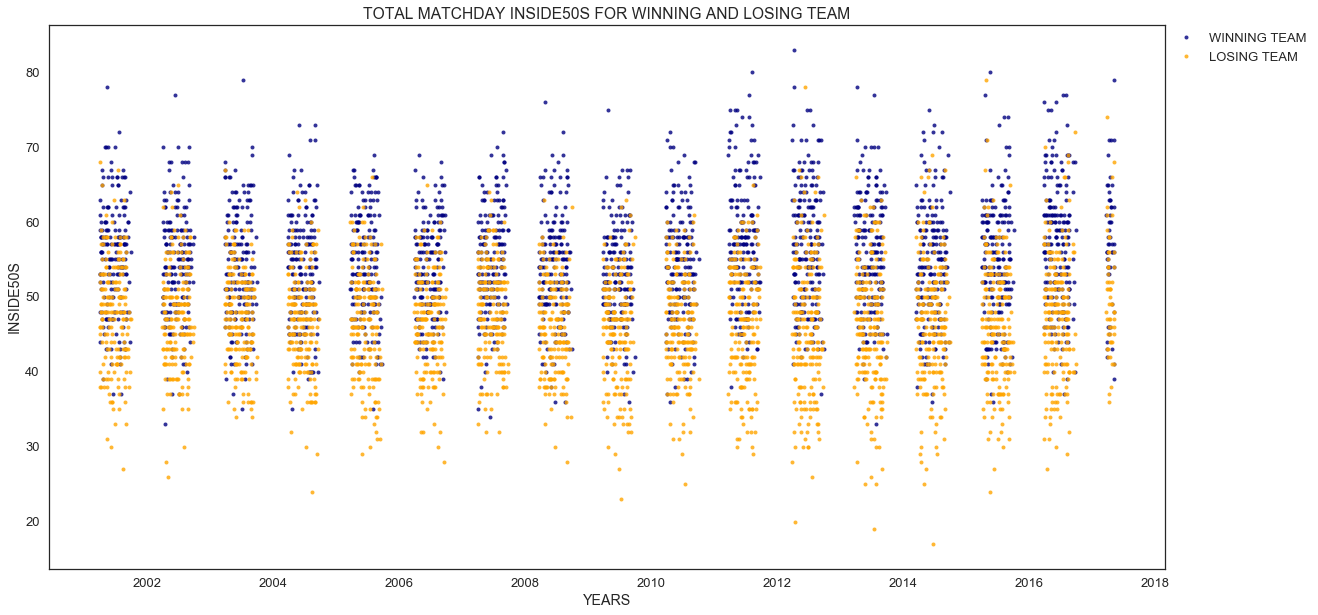

In [315]:
datatype = 'INSIDE50S'
label = 'INSIDE50S'

make_winlossgraph(datatype, label) 

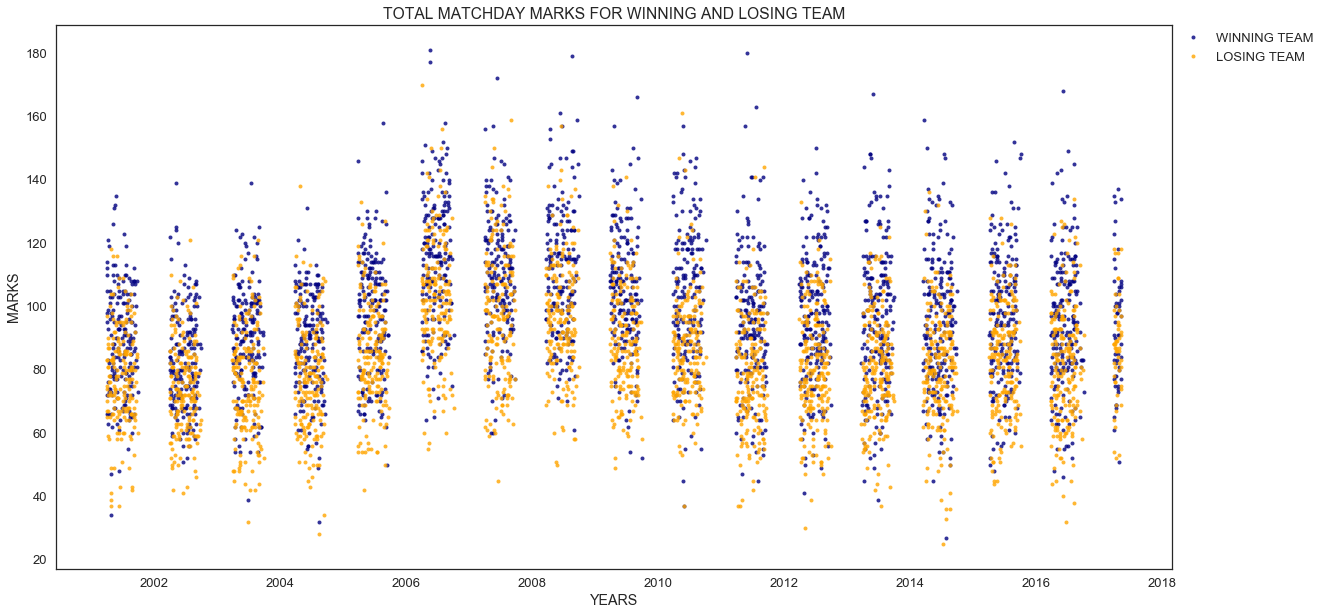

In [316]:
datatype = 'MARKS'
label = 'MARKS'

make_winlossgraph(datatype, label) 

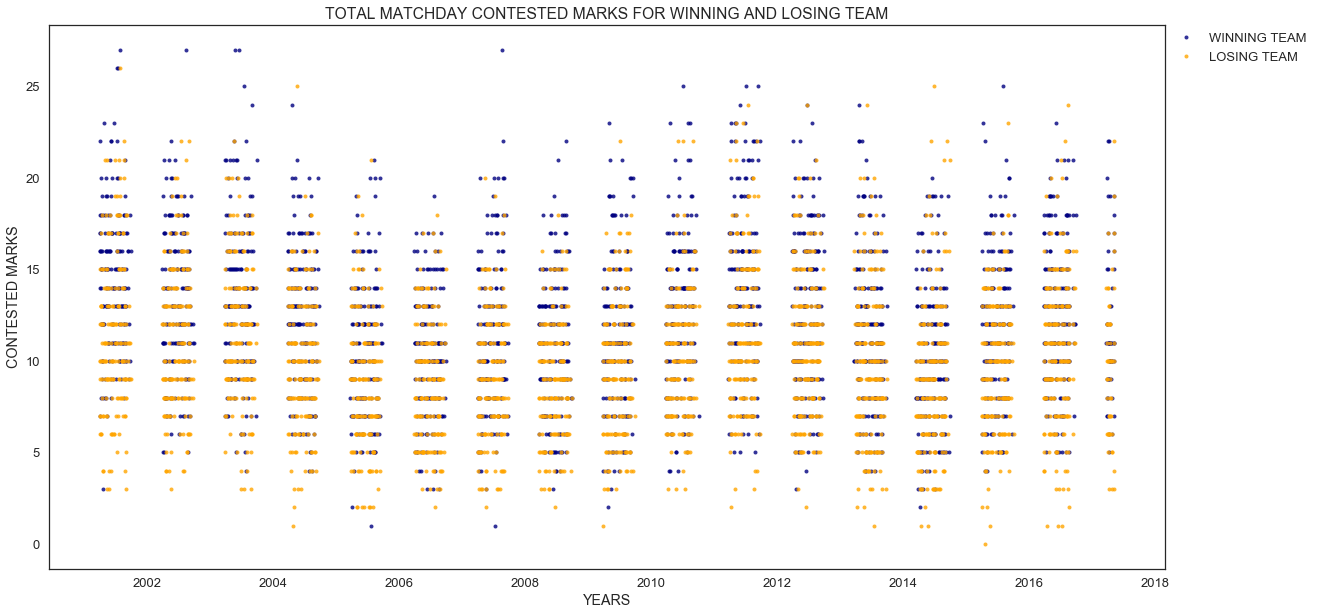

In [317]:
datatype = 'CONTESTEDMARKS'
label = 'CONTESTED MARKS'

make_winlossgraph(datatype, label) 

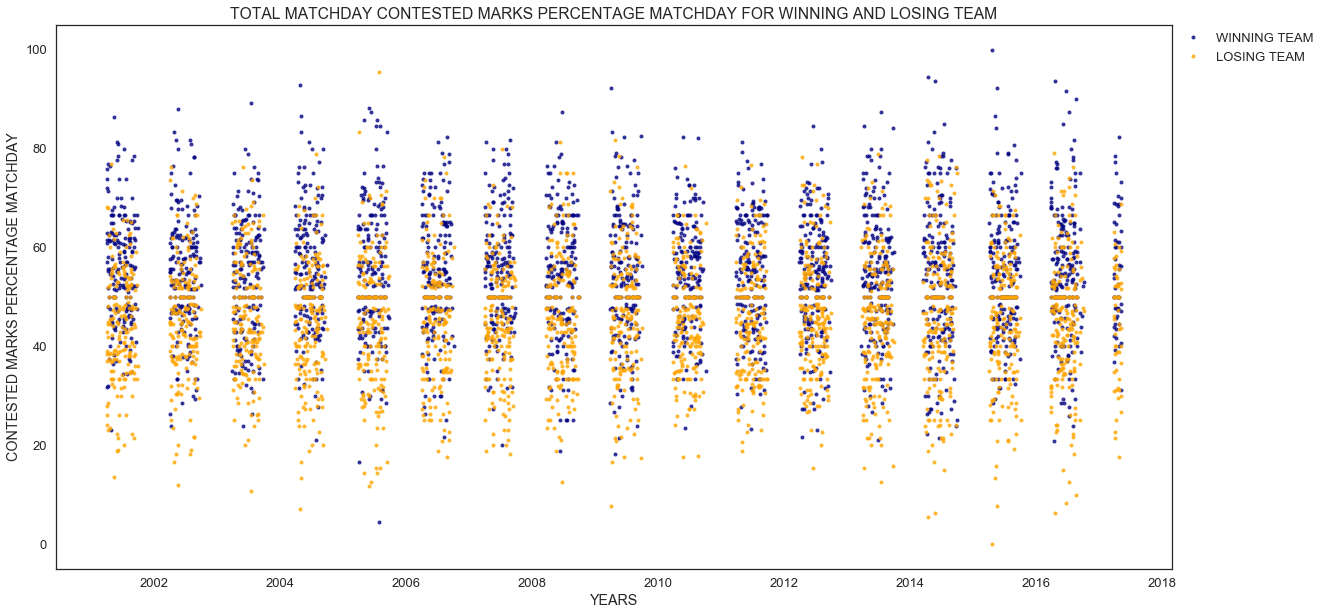

In [336]:
datatype = 'CONTESTEDMARKS _PERC'
label = 'CONTESTED MARKS PERCENTAGE MATCHDAY'

make_winlossgraph(datatype, label) 

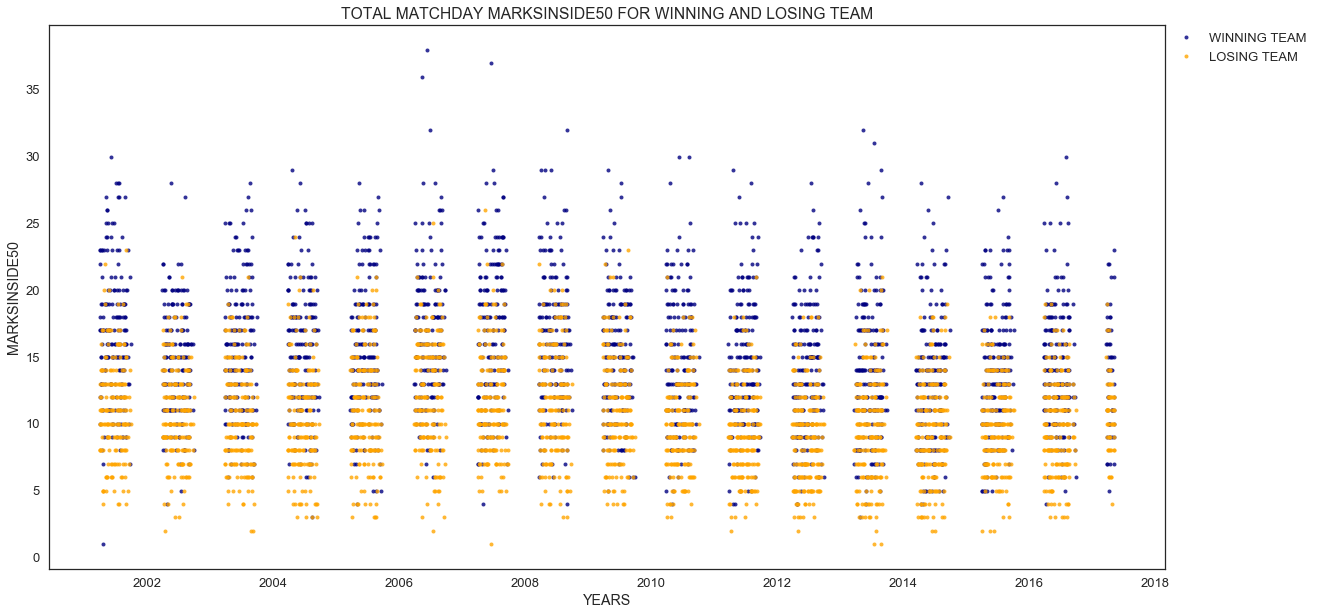

In [318]:
datatype = 'MARKSINSIDE50'
label = 'MARKSINSIDE50'

make_winlossgraph(datatype, label) 

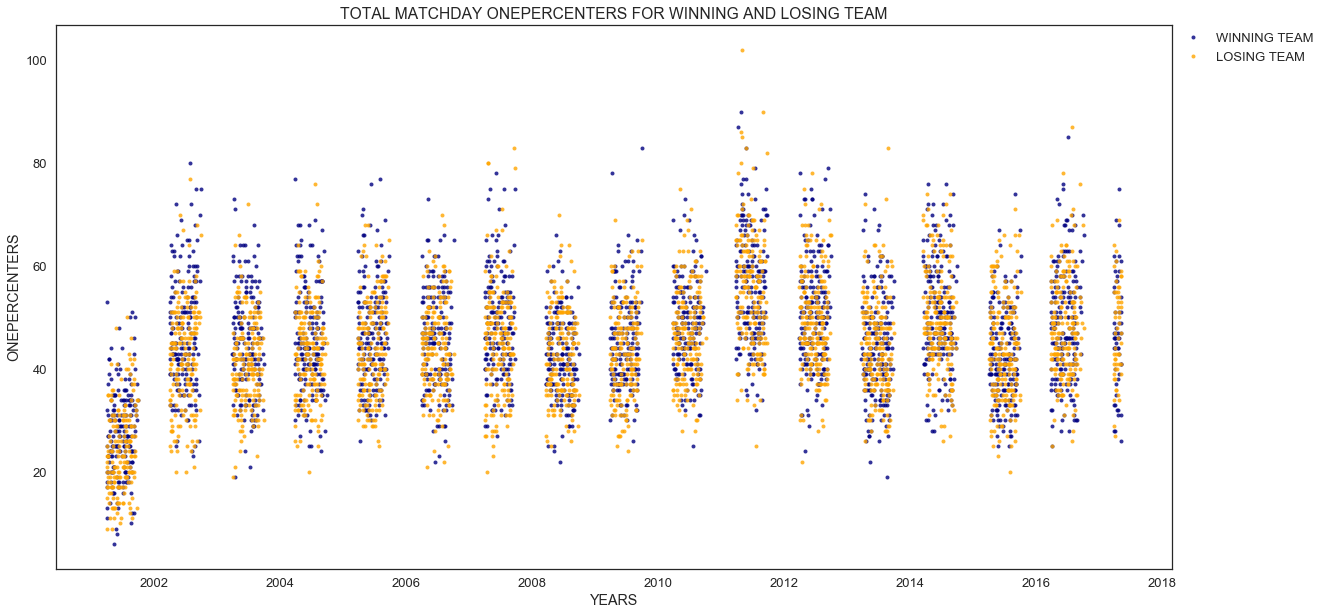

In [320]:
datatype = 'ONEPERCENTERS'
label = 'ONEPERCENTERS'

make_winlossgraph(datatype, label) 

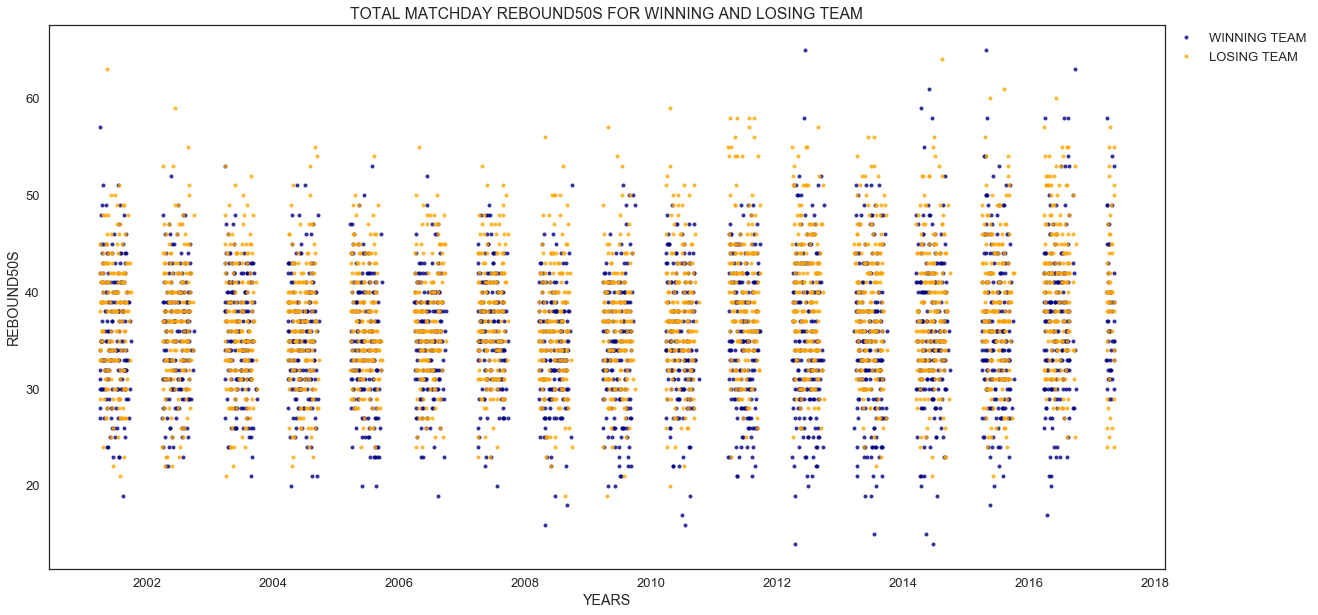

In [321]:
datatype = 'REBOUND50S'
label = 'REBOUND50S'

make_winlossgraph(datatype, label) 

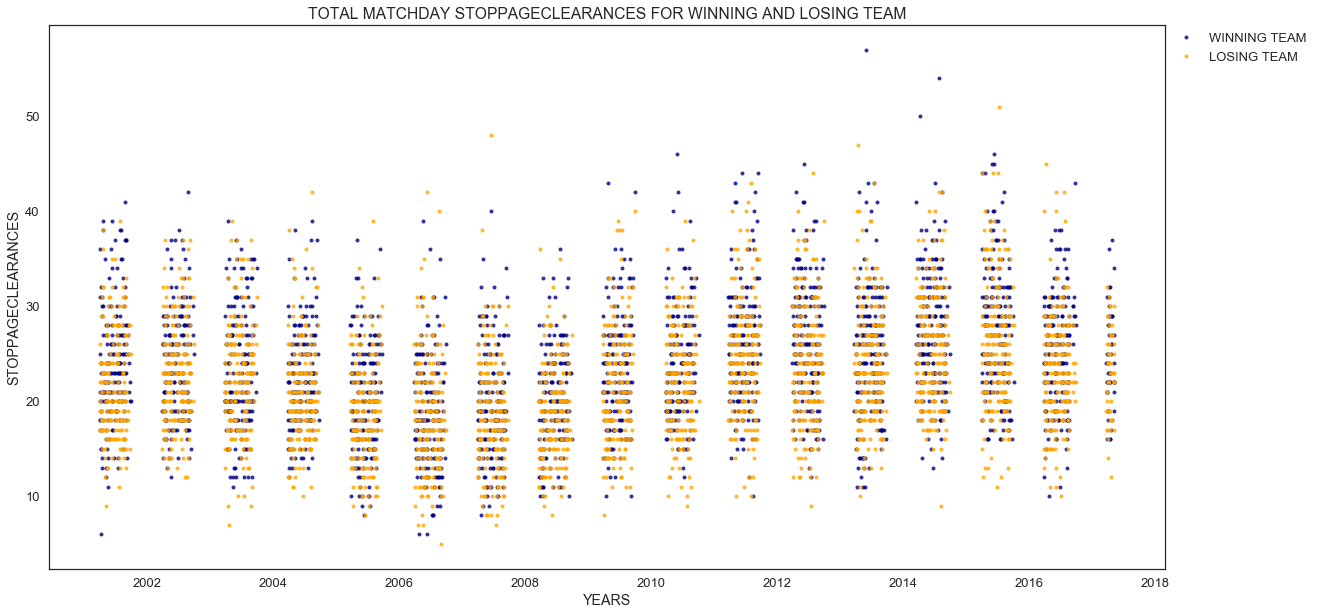

In [322]:
datatype = 'STOPPAGECLEARANCES'
label = 'STOPPAGECLEARANCES'

make_winlossgraph(datatype, label) 

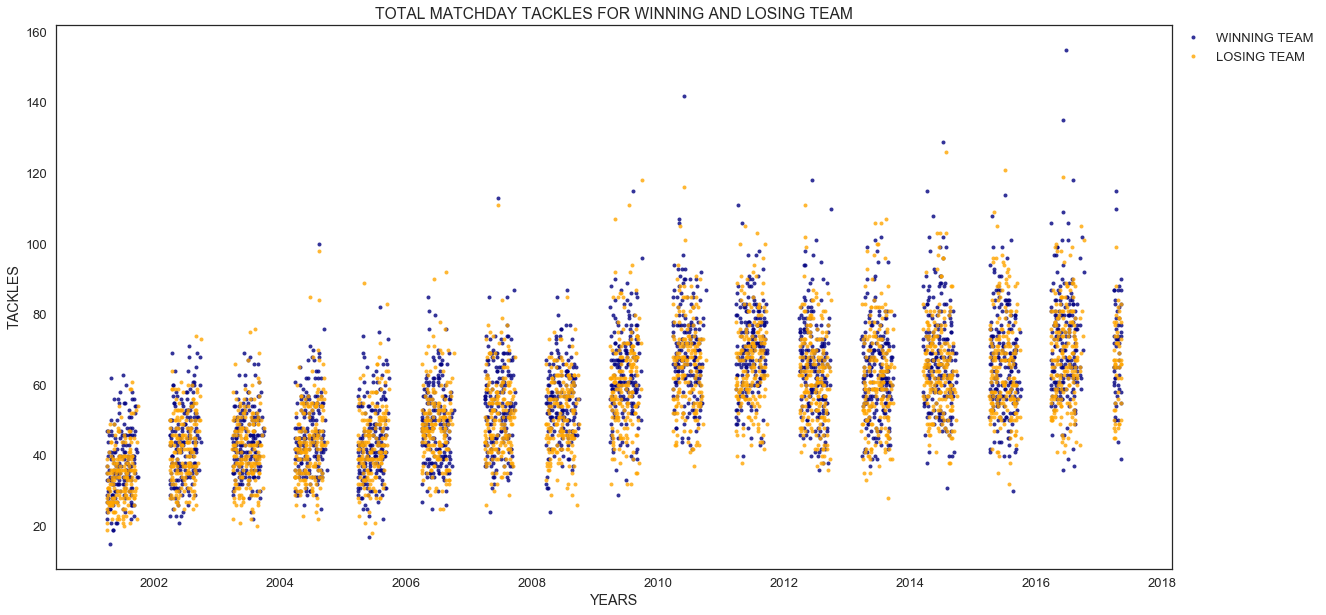

In [323]:
datatype = 'TACKLES'
label = 'TACKLES'

make_winlossgraph(datatype, label) 

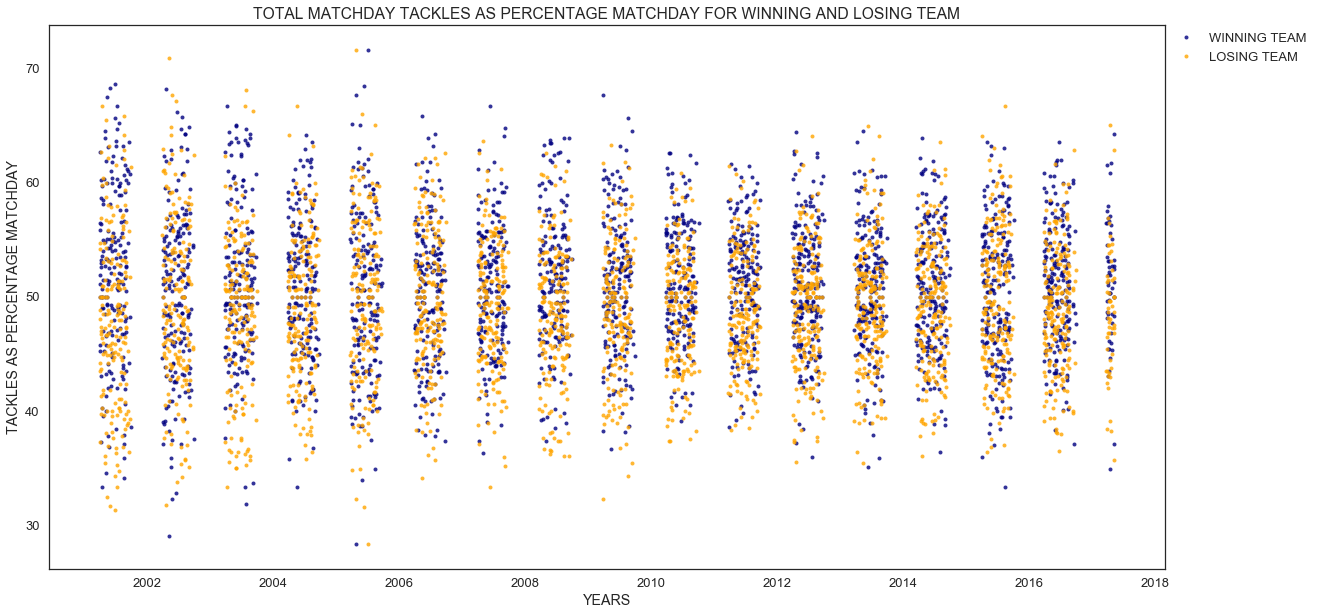

In [325]:
datatype = 'TACKLES_PERC'
label = 'TACKLES AS PERCENTAGE MATCHDAY'

make_winlossgraph(datatype, label) 

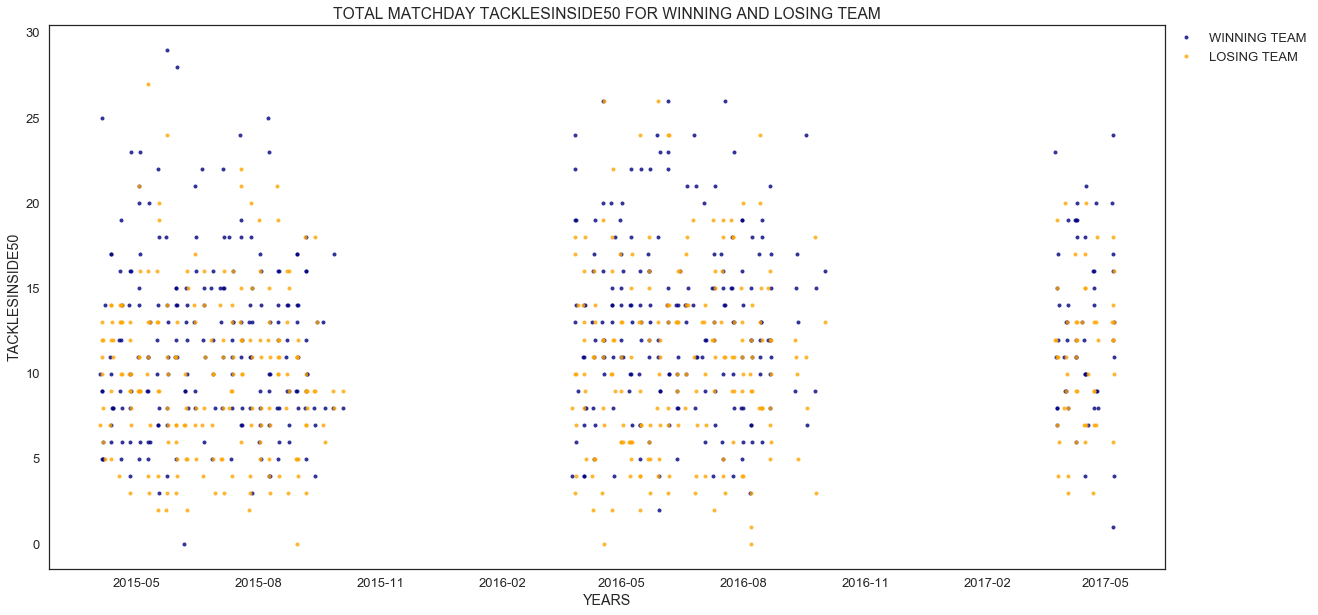

In [324]:
datatype = 'TACKLESINSIDE50'
label = 'TACKLESINSIDE50'

make_winlossgraph(datatype, label) 

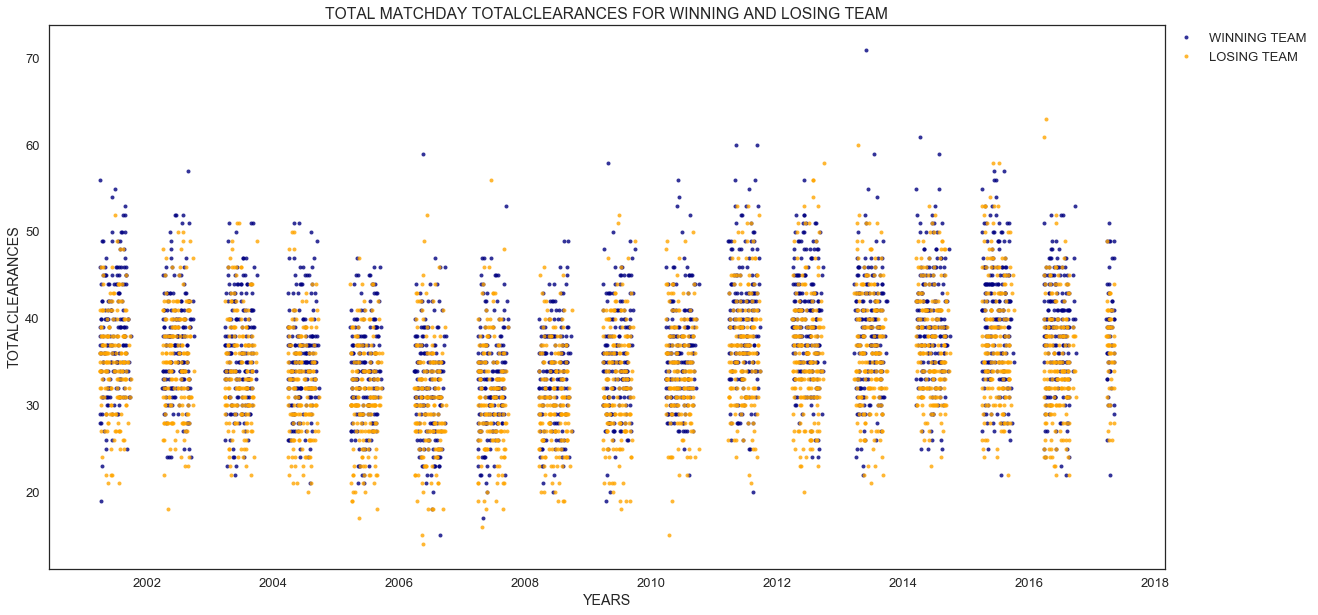

In [326]:
datatype = 'TOTALCLEARANCES'
label = 'TOTALCLEARANCES'

make_winlossgraph(datatype, label) 

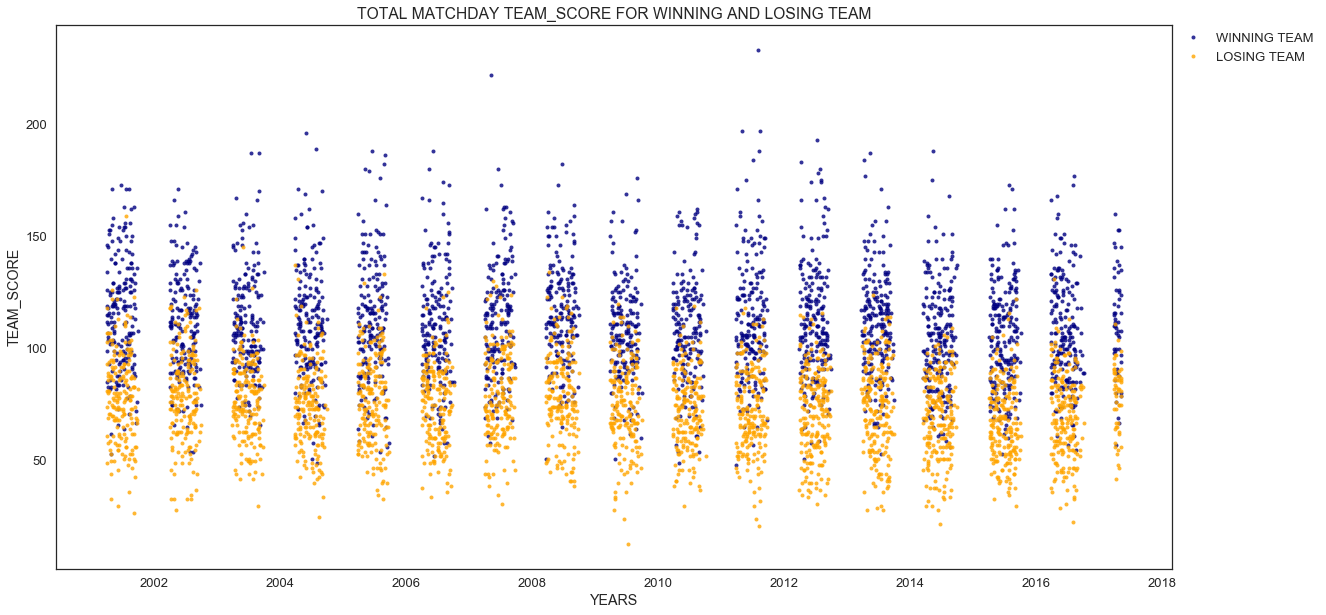

In [341]:
datatype = 'TEAM_SCORE'
label = 'TEAM_SCORE'

make_winlossgraph(datatype, label) 

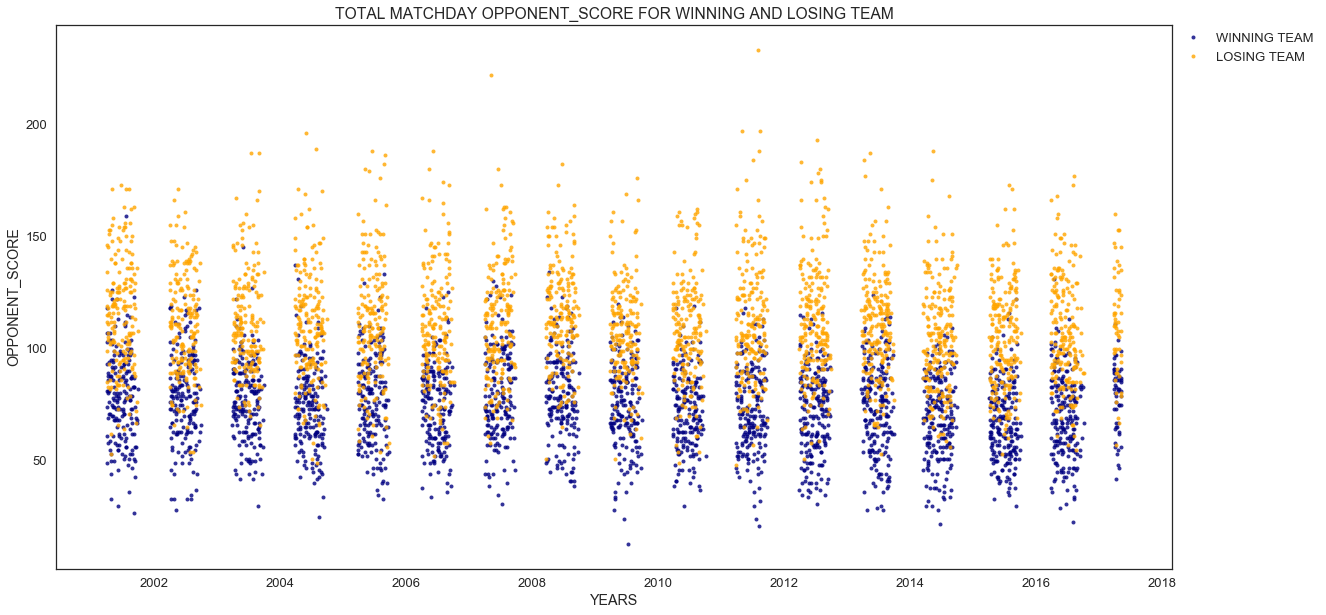

In [342]:
datatype = 'OPPONENT_SCORE'
label = 'OPPONENT_SCORE'

make_winlossgraph(datatype, label) 

In [ ]:
datatype = 'DISPOSALS'
label = 'DISPOSALS'

make_winlossgraph(datatype, label) 

## uncontested possessionb as % of total possession

###do  KICKS PERC

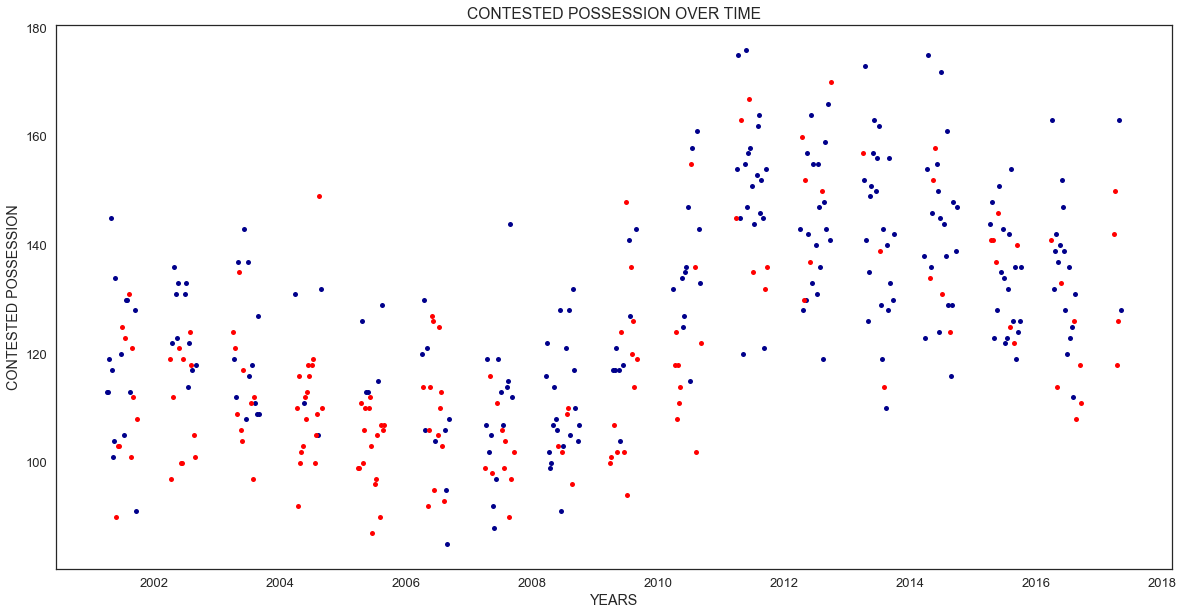

In [134]:
y1 = df_win[df_win.TEAMNAME == "Hawthorn"].CONTESTEDPOSSESSIONS
y2= df_lose[df_lose.TEAMNAME == "Hawthorn"].CONTESTEDPOSSESSIONS
time_range_01 = df_win[df_win.TEAMNAME == "Hawthorn"].PLOT_TIME
time_range_02 = df_lose[df_lose.TEAMNAME == "Hawthorn"].PLOT_TIME

plt.plot_date(time_range_01, y1, markersize= 5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range_02, y2, markersize= 5, markerfacecolor = 'Red')

plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

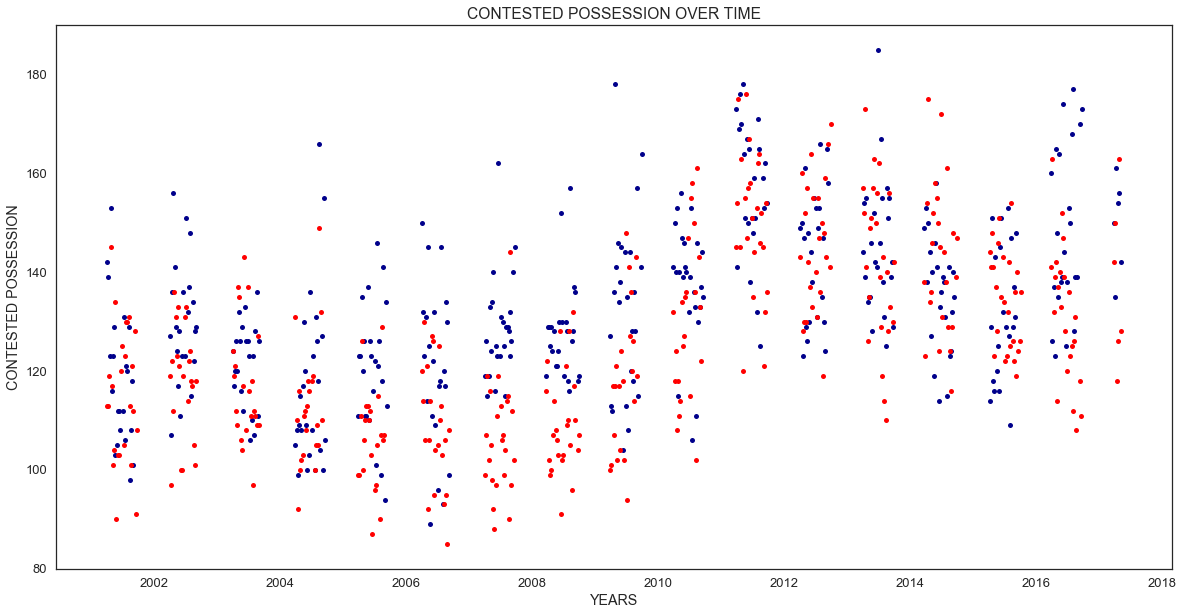

In [146]:
y1= df[df.TEAMNAME == "Geelong Cats"].CONTESTEDPOSSESSIONS
time_range_01 = df[df.TEAMNAME == "Geelong Cats"].PLOT_TIME
y2= df[df.TEAMNAME == "Hawthorn"].CONTESTEDPOSSESSIONS
time_range_02 = df[df.TEAMNAME == "Hawthorn"].PLOT_TIME

plt.plot_date(time_range_01, y1, markersize= 5, markerfacecolor = 'DarkBlue')
plt.plot_date(time_range_02, y2, markersize= 5, markerfacecolor = 'Red')

plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

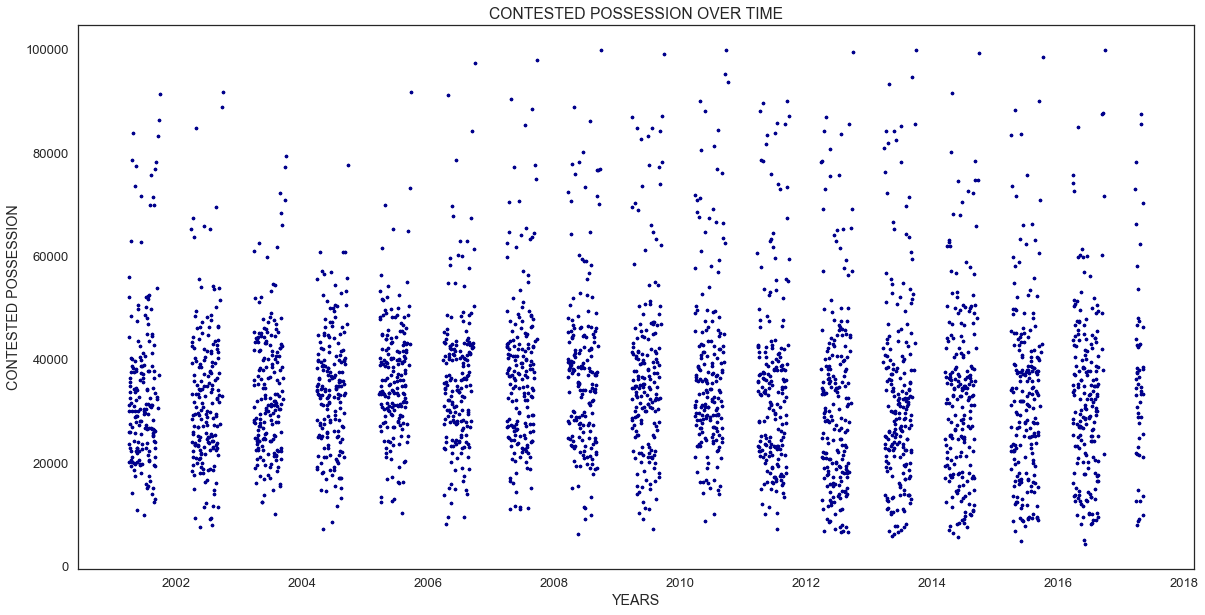

In [115]:
y1 = df.CROWD
time_range = df.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')


plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()

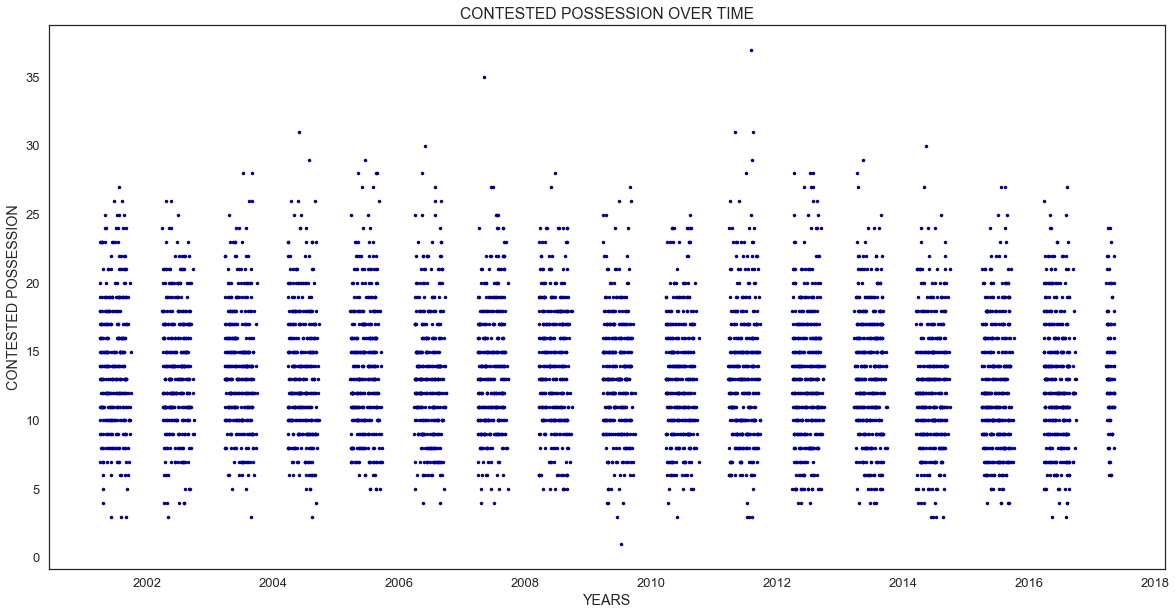

In [164]:
y1 = df.GOALS
time_range = df.PLOT_TIME

plt.plot_date(time_range, y1, markersize= 3.5, markerfacecolor = 'DarkBlue')


plt.title("CONTESTED POSSESSION OVER TIME")
plt.ylabel("CONTESTED POSSESSION")
plt.xlabel("YEARS")
# https://matplotlib.org/users/colors.html
plt.show()